**Seated diners change**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle


with open('/content/drive/MyDrive/seated_diners.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
!pip install matrixprofile

     |████████████████████████████████| 1.1 MB 32.2 MB/s 
     |████████████████████████████████| 1.3 MB 39.3 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.1.0 requires protobuf<4,>=3.13, but you have protobuf 3.11.2 which is incompatible.
googleapis-common-protos 1.53.0 requires protobuf>=3.12.0, but you have protobuf 3.11.2 which is incompatible.
google-api-core 1.26.3 requires protobuf>=3.12.0, but you have protobuf 3.11.2 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import matrixprofile as mp

In [5]:
data.head(50)

,Type,Name,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,...,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25
0,country,Global,-1.00,3.00,-1.00,-2.00,1.00,4.00,1.00,1.00,-2.00,-3.00,-1.00,1.00,0.00,-8.00,-9.00,-6.00,-7.00,-7.00,-4.00,-3.00,-14.00,-18.00,-19.00,-28.00,-36.00,-40.00,-47.00,-56.00,-83.00,-89.00,-96.03,-97.94,-98.96,-99.24,-99.68,-99.72,-99.75,-99.79,...,-6.52,-3.95,-0.62,5.17,41.00,-9.83,-13.05,-6.78,-5.50,0.48,6.56,4.19,-9.22,-51.32,-6.47,10.88,-1.66,3.13,-7.71,11.21,-14.31,-8.65,-7.07,-0.49,4.24,2.29,-11.63,-10.78,-5.05,-2.16,-0.09,2.82,3.70,-6.77,-6.77,-5.00,-3.33,-1.09,1.09,1.01
1,country,Australia,-3.00,-6.00,-3.00,-1.00,0.00,0.00,0.00,-2.00,-2.00,-7.00,0.00,-1.00,4.00,-12.00,-6.00,-12.00,-8.00,-6.00,-3.00,-4.00,-10.00,-4.00,-10.00,-12.00,-8.00,-11.00,-12.00,-30.00,-43.00,-50.00,-53.00,-51.67,-53.61,-65.53,-99.82,-100.00,-100.00,-100.00,...,87.12,99.89,114.11,133.01,150.37,100.68,92.53,99.64,105.91,137.42,111.08,92.98,65.49,26.97,38.40,28.42,43.83,67.51,71.58,46.42,77.20,73.72,75.64,94.09,82.01,81.55,39.40,37.51,37.75,74.41,-13.82,-7.35,-11.27,-17.03,-32.33,-30.71,-32.75,-25.46,-18.15,-24.05
2,country,Canada,-5.00,0.00,-3.00,-2.00,-1.00,8.00,-2.00,-3.00,1.00,-12.00,-8.00,-4.00,-7.00,-12.00,-7.00,-2.00,-4.00,-8.00,-9.00,-1.00,-13.00,-18.00,-19.00,-28.00,-40.00,-41.00,-47.00,-60.00,-94.00,-97.00,-99.47,-99.72,-99.89,-99.94,-99.97,-99.99,-99.97,-99.98,...,-39.11,-37.11,-37.01,-24.31,-0.40,-39.33,-39.42,-33.90,-35.08,-32.98,-23.16,-30.17,-35.06,-66.16,-9.63,-5.78,-29.70,-17.45,-17.17,-24.79,-25.68,-31.22,-38.06,-18.99,-10.87,-20.82,-25.93,-30.69,-18.78,-25.87,-10.40,-3.27,-4.18,-9.50,-12.42,-8.81,-8.95,-1.86,-3.64,-2.94
3,country,Germany,11.00,4.00,3.00,5.00,1.00,2.00,11.00,4.00,5.00,5.00,11.00,7.00,9.00,-8.00,0.00,-4.00,-6.00,-7.00,4.00,11.00,-10.00,-16.00,-11.00,-17.00,-28.00,-38.00,-46.00,-63.00,-90.00,-95.00,-98.36,-98.79,-99.78,-99.96,-100.00,-100.00,-100.00,-100.00,...,5.62,-4.50,22.35,15.04,39.18,5.25,-0.31,10.91,4.19,25.70,45.00,56.03,5.56,-9.27,9.34,16.30,36.37,48.59,33.20,4.59,12.71,20.79,17.58,29.51,45.90,36.75,18.32,21.44,29.46,35.39,57.95,60.22,59.52,36.07,47.12,60.43,63.09,69.96,54.90,44.51
4,country,Ireland,2.00,0.00,4.00,1.00,-3.00,4.00,-9.00,-8.00,-10.00,-2.00,-10.00,-13.00,10.00,-6.00,-7.00,-1.00,-15.00,-13.00,-5.00,4.00,-10.00,-28.00,-27.00,-46.00,-51.00,-52.00,-75.00,-70.00,-86.00,-97.00,-98.55,-99.08,-98.76,-98.31,-100.00,-99.55,-100.00,-100.00,...,36.16,26.72,49.77,43.83,88.65,73.12,31.42,27.91,19.57,31.86,44.11,80.28,76.11,58.35,81.67,54.06,44.04,24.91,47.37,80.93,36.43,67.49,64.20,61.41,56.11,72.85,86.29,73.97,78.93,80.49,58.14,41.76,78.27,63.83,52.67,66.53,59.38,51.59,41.80,73.68
5,country,Mexico,-5.00,-5.00,-4.00,-3.00,-1.00,2.00,-1.00,-3.00,-9.00,-7.00,-10.00,-5.00,-7.00,-7.00,-10.00,-6.00,-6.00,-8.00,-2.00,-5.00,-19.00,-16.00,-15.00,-16.00,-16.00,-21.00,-35.00,-48.00,-62.00,-73.00,-78.41,-85.12,-90.81,-95.20,-94.60,-95.81,-96.60,-97.33,...,13.44,12.47,20.91,35.57,75.31,29.15,11.21,12.81,13.18,16.43,27.47,23.13,25.00,-54.28,17.02,8.64,15.92,29.05,42.17,32.57,19.28,16.24,11.97,20.12,25.18,23.81,22.70,8.29,13.90,13.26,21.64,27.28,24.64,23.32,15.84,15.16,12.53,16.15,19.56,18.74
6,country,United Kingdom,1.00,-1.00,-2.00,0.00,-1.00,-4.00,-6.0

In [6]:
data['Name'].unique()

array(['Global', 'Australia', 'Canada', 'Germany', 'Ireland', 'Mexico',
       'United Kingdom', 'United States', 'Alabama', 'Alberta', 'Arizona',
       'Baden-Württemberg', 'Baja California Sur', 'Bavaria',
       'British Columbia', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Hesse', 'Illinois', 'Indiana', 'Jalisco', 'Kansas', 'Kentucky',
       'Louisiana', 'Lower Saxony', 'Maine', 'Manitoba', 'Maryland',
       'Massachusetts', 'Mexico City', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New South Wales', 'New York', 'North Carolina',
       'North Rhine-Westphalia', 'Nuevo Leon', 'Ohio', 'Oklahoma',
       'Ontario', 'Oregon', 'Pennsylvania', 'Quebec', 'Queensland',
       'Quintana Roo', 'Rhineland-Palatinate', 'Rhode Island', 'Saxony',
       'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Victoria',
       'Virginia', 'Washin

**Transposing data**

In [7]:
df=data.T

In [9]:
df=df.drop('Type')

In [11]:
df=df.rename(columns=df.iloc[0])

In [12]:
df.drop('Name')

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baden-Württemberg,Baja California Sur,Bavaria,British Columbia,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Hesse,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Lower Saxony,Maine,Manitoba,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,...,Fort Lauderdale,Frankfurt am Main,Hamburg,Honolulu,Houston,Indianapolis,Kansas City,Las Vegas,London,Los Angeles,Louisville,Manchester (UK),Miami,Miami Beach,Milwaukee,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,St. Louis,Tampa,Toronto,Tucson,Vancouver,Washington
2020-02-18,-1,-3,-5,11,2,-5,1,0,-14,2,0,-99.38,-6,-98.19,8,-2,1,8,-58.31,-5,0,0,0,-98.68,-4,21,8,39,11,-6,-98.9,-59.39,-97.89,6,0,-8,-12,-11,32,30,...,-8,-99.27,13,-3,-2,52,-36.99,-22,4,7,28,-100,0,19,-62.1,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,-51.86,7,-14,-63.85,9,-5
2020-02-19,3,-6,0,4,0,-5,-1,4,7,10,1,-96.53,-2,-97.85,-3,2,-8,26,-27.99,55,-3,4,2,-96.91,4,13,9,2,14,2,-95.81,-26.22,-94.76,70,7,-9,0,51,17,8,...,-4,-99.45,12,1,-8,14,-53.29,-19,1,6,11,-100,-8,-2,-82.43,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,-69.25,5,-8,-40.67,1,57
2020-02-20,-1,-3,-3,3,4,-4,-2,0,1,2,8,-96.59,-2,-97.62,1,5,-4,1,-33.16,8,-4,-6,4,-98.57,-2,-15,0,-14,2,9,-95.02,-16.81,-96.36,4,5,-1,-9,-15,-1,6,...,-6,-99.33,4,3,-3,-28,-41.73,-6,2,9,7,-99.39,-5,6,-81.5,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,-62.56,2,-9,-22.83,7,9
2020-02-21,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-99.22,-9,-96.5,6,0,7,-3,-50.38,0,-5,-5,5,-97.31,-3,-8,5,-11,6,10,-92.36,-41.67,-100,1,-7,-2,-12,-9,3,-1,...,-14,-96.22,12,9,3,-15,-51.49,0,3,1,0,-99.95,1,7,-81.98,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-70,-4,-9,-40,6,0
2020-02-22,1,0,-1,1,-3,-1,-1,2,8,5,-3,-97.2,1,-97.58,3,-2,1,-6,-40.94,8,2,-2,4,-97.64,6,3,-6,-4,11,2,-94.46,-50.92,-99.31,8,-1,0,0,17,1,163,...,-8,-98.75,6,9,1,4,-46.21,-4,-1,8,6,-100,5,10,-73.89,12,14,-1,3,10,10,3,2,2,0,-4,6,4,-6,-12,-9,10,-5,1,-64.04,11,-4,-40.22,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-21,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,NaN,100.27,NaN,-18.53,-12.99,-3.66,27.45,NaN,-41.47,22.11,-3.96,-6.55,NaN,-28.04,6.1,31.17,-14.61,5.82,0.5,NaN,NaN,NaN,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,...,29.06,NaN,8.49,-23.3,-12.28,-16.42,NaN,53.08,-36.16,-33.66,-4.81,NaN,28.77,15.6,NaN,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,NaN,13.84,-38.55,NaN,-45.31,-41.95
2021-07-22,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,NaN,81.14,NaN,-14.33,-13.36,-3.51,35.63,NaN,-39.54,20.99,-0.98,-8.01,NaN,-25.54,6.86,19.59,-12.89,4.84,0.01,NaN,NaN,NaN,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,...,48.88,NaN,8.52,-26.77,-7.29,-13.9,NaN,41.85,-30.22,-34.63,-3.95,NaN,42.86,33.35,NaN,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,16.69,-51.31,NaN,23.97,-38.32,NaN,-40.87,-40.09
2021-07-23,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,-15.1,14.2,2.72,NaN,62.9,NaN,-13.72,-9.75,-6.03,32.25,NaN,-28.18,12.13,0.91,-10.17,NaN,-19.94,12.74,22.51,-10.25,5.15,-0.13,NaN,NaN,NaN,-17.45,-6.58,-11.97,-3.99,-13.16,-17.8,19.62,...,31.94,NaN,20.39,-21.15,4.86,-3.92,NaN,35.96,-22.3,-36.21,-0.34,NaN,17.97,7.67,NaN,-49.23,-38.76,56.21,21.18,1.74,-12.18,-46.74,5.23,-28.6,-12.23,-2.82,-46.12,-22.77,18.67,-1.91,-50.44,-1.54,9.1,-48.63,NaN,17.85,-26.92,NaN,-38.19,-29.

In [13]:
df['Date'] = df.index

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baden-Württemberg,Baja California Sur,Bavaria,British Columbia,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Hesse,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Lower Saxony,Maine,Manitoba,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,...,Frankfurt am Main,Hamburg,Honolulu,Houston,Indianapolis,Kansas City,Las Vegas,London,Los Angeles,Louisville,Manchester (UK),Miami,Miami Beach,Milwaukee,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,St. Louis,Tampa,Toronto,Tucson,Vancouver,Washington,Date
0,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baden-Württemberg,Baja California Sur,Bavaria,British Columbia,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Hesse,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Lower Saxony,Maine,Manitoba,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,...,Frankfurt am Main,Hamburg,Honolulu,Houston,Indianapolis,Kansas City,Las Vegas,London,Los Angeles,Louisville,Manchester (UK),Miami,Miami Beach,Milwaukee,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,St. Louis,Tampa,Toronto,Tucson,Vancouver,Washington,Name
1,-1,-3,-5,11,2,-5,1,0,-14,2,0,-99.38,-6,-98.19,8,-2,1,8,-58.31,-5,0,0,0,-98.68,-4,21,8,39,11,-6,-98.9,-59.39,-97.89,6,0,-8,-12,-11,32,30,...,-99.27,13,-3,-2,52,-36.99,-22,4,7,28,-100,0,19,-62.1,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,-51.86,7,-14,-63.85,9,-5,2020-02-18
2,3,-6,0,4,0,-5,-1,4,7,10,1,-96.53,-2,-97.85,-3,2,-8,26,-27.99,55,-3,4,2,-96.91,4,13,9,2,14,2,-95.81,-26.22,-94.76,70,7,-9,0,51,17,8,...,-99.45,12,1,-8,14,-53.29,-19,1,6,11,-100,-8,-2,-82.43,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,-69.25,5,-8,-40.67,1,57,2020-02-19
3,-1,-3,-3,3,4,-4,-2,0,1,2,8,-96.59,-2,-97.62,1,5,-4,1,-33.16,8,-4,-6,4,-98.57,-2,-15,0,-14,2,9,-95.02,-16.81,-96.36,4,5,-1,-9,-15,-1,6,...,-99.33,4,3,-3,-28,-41.73,-6,2,9,7,-99.39,-5,6,-81.5,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,-62.56,2,-9,-22.83,7,9,2020-02-20
4,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-99.22,-9,-96.5,6,0,7,-3,-50.38,0,-5,-5,5,-97.31,-3,-8,5,-11,6,10,-92.36,-41.67,-100,1,-7,-2,-12,-9,3,-1,...,-96.22,12,9,3,-15,-51.49,0,3,1,0,-99.95,1,7,-81.98,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-70,-4,-9,-40,6,0,2020-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,NaN,100.27,NaN,-18.53,-12.99,-3.66,27.45,NaN,-41.47,22.11,-3.96,-6.55,NaN,-28.04,6.1,31.17,-14.61,5.82,0.5,NaN,NaN,NaN,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,...,NaN,8.49,-23.3,-12.28,-16.42,NaN,53.08,-36.16,-33.66,-4.81,NaN,28.77,15.6,NaN,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,NaN,13.84,-38.55,NaN,-45.31,-41.95,2021-07-21
521,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,NaN,81.14,NaN,-14.33,-13.36,-3.51,35.63,NaN,-39.54,20.99,-0.98,-8.01,NaN,-25.54,6.86,19.59,-12.89,4.84,0.01,NaN,NaN,NaN,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,...,NaN,8.52,-26.77,-7.29,-13.9,NaN,41.85,-30.22,-34.63,-3.95,NaN,42.86,33.35,NaN,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,

In [17]:
df = df.drop(labels=0, axis=0)

In [18]:
df

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baden-Württemberg,Baja California Sur,Bavaria,British Columbia,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Hesse,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Lower Saxony,Maine,Manitoba,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,...,Frankfurt am Main,Hamburg,Honolulu,Houston,Indianapolis,Kansas City,Las Vegas,London,Los Angeles,Louisville,Manchester (UK),Miami,Miami Beach,Milwaukee,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,St. Louis,Tampa,Toronto,Tucson,Vancouver,Washington,Date
1,-1,-3,-5,11,2,-5,1,0,-14,2,0,-99.38,-6,-98.19,8,-2,1,8,-58.31,-5,0,0,0,-98.68,-4,21,8,39,11,-6,-98.9,-59.39,-97.89,6,0,-8,-12,-11,32,30,...,-99.27,13,-3,-2,52,-36.99,-22,4,7,28,-100,0,19,-62.1,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,-51.86,7,-14,-63.85,9,-5,2020-02-18
2,3,-6,0,4,0,-5,-1,4,7,10,1,-96.53,-2,-97.85,-3,2,-8,26,-27.99,55,-3,4,2,-96.91,4,13,9,2,14,2,-95.81,-26.22,-94.76,70,7,-9,0,51,17,8,...,-99.45,12,1,-8,14,-53.29,-19,1,6,11,-100,-8,-2,-82.43,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,-69.25,5,-8,-40.67,1,57,2020-02-19
3,-1,-3,-3,3,4,-4,-2,0,1,2,8,-96.59,-2,-97.62,1,5,-4,1,-33.16,8,-4,-6,4,-98.57,-2,-15,0,-14,2,9,-95.02,-16.81,-96.36,4,5,-1,-9,-15,-1,6,...,-99.33,4,3,-3,-28,-41.73,-6,2,9,7,-99.39,-5,6,-81.5,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,-62.56,2,-9,-22.83,7,9,2020-02-20
4,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-99.22,-9,-96.5,6,0,7,-3,-50.38,0,-5,-5,5,-97.31,-3,-8,5,-11,6,10,-92.36,-41.67,-100,1,-7,-2,-12,-9,3,-1,...,-96.22,12,9,3,-15,-51.49,0,3,1,0,-99.95,1,7,-81.98,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-70,-4,-9,-40,6,0,2020-02-21
5,1,0,-1,1,-3,-1,-1,2,8,5,-3,-97.2,1,-97.58,3,-2,1,-6,-40.94,8,2,-2,4,-97.64,6,3,-6,-4,11,2,-94.46,-50.92,-99.31,8,-1,0,0,17,1,163,...,-98.75,6,9,1,4,-46.21,-4,-1,8,6,-100,5,10,-73.89,12,14,-1,3,10,10,3,2,2,0,-4,6,4,-6,-12,-9,10,-5,1,-64.04,11,-4,-40.22,7,9,2020-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,NaN,100.27,NaN,-18.53,-12.99,-3.66,27.45,NaN,-41.47,22.11,-3.96,-6.55,NaN,-28.04,6.1,31.17,-14.61,5.82,0.5,NaN,NaN,NaN,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,...,NaN,8.49,-23.3,-12.28,-16.42,NaN,53.08,-36.16,-33.66,-4.81,NaN,28.77,15.6,NaN,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,NaN,13.84,-38.55,NaN,-45.31,-41.95,2021-07-21
521,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,NaN,81.14,NaN,-14.33,-13.36,-3.51,35.63,NaN,-39.54,20.99,-0.98,-8.01,NaN,-25.54,6.86,19.59,-12.89,4.84,0.01,NaN,NaN,NaN,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,...,NaN,8.52,-26.77,-7.29,-13.9,NaN,41.85,-30.22,-34.63,-3.95,NaN,42.86,33.35,NaN,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,16.69,-51.31,NaN,23.97,-38.32,NaN,-40.87,-40.09,2021-07-22
522,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,-15.1,14.2,2.72,NaN,62.9,NaN,-13.72,-9.75,-6.03,32.25,NaN,-28.18,12.13,0.91,-10.17,NaN,-19.94,12.74,22.51,-10.25,5.15,-0.13,NaN,NaN,NaN,-17.45,-6.58,-11.97,-3.99,-13.16,-17.8,19.62,...,NaN,20.39,-21.15,4.86,-3.92,NaN,35.96,-22.3,-36.21,-0.34,NaN,17.97,7.67,NaN,-49.23,-38.76,56.21,21.18,1.74,-12.18,-46.74,5.23,-28.6,-12.23,-2.82,-46.12,-22.77,18.67,-1.91,-50.44,-1.54,9.1,-48.63,NaN,17.85,-26.92,NaN,-38.19,-29.21,2021-07-23
523,1.09,-18.15,-3.6

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baden-Württemberg,Baja California Sur,Bavaria,British Columbia,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Hesse,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Lower Saxony,Maine,Manitoba,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,...,Frankfurt am Main,Hamburg,Honolulu,Houston,Indianapolis,Kansas City,Las Vegas,London,Los Angeles,Louisville,Manchester (UK),Miami,Miami Beach,Milwaukee,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,St. Louis,Tampa,Toronto,Tucson,Vancouver,Washington,Date
0,-1,-3,-5,11,2,-5,1,0,-14,2,0,-99.38,-6,-98.19,8,-2,1,8,-58.31,-5,0,0,0,-98.68,-4,21,8,39,11,-6,-98.9,-59.39,-97.89,6,0,-8,-12,-11,32,30,...,-99.27,13,-3,-2,52,-36.99,-22,4,7,28,-100,0,19,-62.1,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,-51.86,7,-14,-63.85,9,-5,2020-02-18
1,3,-6,0,4,0,-5,-1,4,7,10,1,-96.53,-2,-97.85,-3,2,-8,26,-27.99,55,-3,4,2,-96.91,4,13,9,2,14,2,-95.81,-26.22,-94.76,70,7,-9,0,51,17,8,...,-99.45,12,1,-8,14,-53.29,-19,1,6,11,-100,-8,-2,-82.43,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,-69.25,5,-8,-40.67,1,57,2020-02-19
2,-1,-3,-3,3,4,-4,-2,0,1,2,8,-96.59,-2,-97.62,1,5,-4,1,-33.16,8,-4,-6,4,-98.57,-2,-15,0,-14,2,9,-95.02,-16.81,-96.36,4,5,-1,-9,-15,-1,6,...,-99.33,4,3,-3,-28,-41.73,-6,2,9,7,-99.39,-5,6,-81.5,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,-62.56,2,-9,-22.83,7,9,2020-02-20
3,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-99.22,-9,-96.5,6,0,7,-3,-50.38,0,-5,-5,5,-97.31,-3,-8,5,-11,6,10,-92.36,-41.67,-100,1,-7,-2,-12,-9,3,-1,...,-96.22,12,9,3,-15,-51.49,0,3,1,0,-99.95,1,7,-81.98,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-70,-4,-9,-40,6,0,2020-02-21
4,1,0,-1,1,-3,-1,-1,2,8,5,-3,-97.2,1,-97.58,3,-2,1,-6,-40.94,8,2,-2,4,-97.64,6,3,-6,-4,11,2,-94.46,-50.92,-99.31,8,-1,0,0,17,1,163,...,-98.75,6,9,1,4,-46.21,-4,-1,8,6,-100,5,10,-73.89,12,14,-1,3,10,10,3,2,2,0,-4,6,4,-6,-12,-9,10,-5,1,-64.04,11,-4,-40.22,7,9,2020-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,NaN,100.27,NaN,-18.53,-12.99,-3.66,27.45,NaN,-41.47,22.11,-3.96,-6.55,NaN,-28.04,6.1,31.17,-14.61,5.82,0.5,NaN,NaN,NaN,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,...,NaN,8.49,-23.3,-12.28,-16.42,NaN,53.08,-36.16,-33.66,-4.81,NaN,28.77,15.6,NaN,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,NaN,13.84,-38.55,NaN,-45.31,-41.95,2021-07-21
520,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,NaN,81.14,NaN,-14.33,-13.36,-3.51,35.63,NaN,-39.54,20.99,-0.98,-8.01,NaN,-25.54,6.86,19.59,-12.89,4.84,0.01,NaN,NaN,NaN,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,...,NaN,8.52,-26.77,-7.29,-13.9,NaN,41.85,-30.22,-34.63,-3.95,NaN,42.86,33.35,NaN,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,16.69,-51.31,NaN,23.97,-38.32,NaN,-40.87,-40.09,2021-07-22
521,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,-15.1,14.2,2.72,NaN,62.9,NaN,-13.72,-9.75,-6.03,32.25,NaN,-28.18,12.13,0.91,-10.17,NaN,-19.94,12.74,22.51,-10.25,5.15,-0.13,NaN,NaN,NaN,-17.45,-6.58,-11.97,-3.99,-13.16,-17.8,19.62,...,NaN,20.39,-21.15,4.86,-3.92,NaN,35.96,-22.3,-36.21,-0.34,NaN,17.97,7.67,NaN,-49.23,-38.76,56.21,21.18,1.74,-12.18,-46.74,5.23,-28.6,-12.23,-2.82,-46.12,-22.77,18.67,-1.91,-50.44,-1.54,9.1,-48.63,NaN,17.85,-26.92,NaN,-38.19,-29.21,2021-07-23
522,1.09,-18.15,-3.6

**Checking for null values**

In [21]:
df.isnull().sum().tail(60)

Austin                      0
Baltimore                   0
Berlin                    265
Beverly Hills             265
Boca Raton                265
Boston                      0
Brooklyn                  265
Calgary                     0
Cambridge (US)            265
Charlotte                   0
Chicago                     0
Cincinnati                  0
Ciudad de México            0
Cleveland                 265
Columbus                    0
Dallas                      0
Denver                      0
Dublin                      0
Edmonton (CA)               0
Fort Lauderdale             0
Frankfurt am Main         265
Hamburg                     0
Honolulu                    0
Houston                     0
Indianapolis                0
Kansas City               265
Las Vegas                   0
London                      0
Los Angeles                 0
Louisville                  0
Manchester (UK)           265
Miami                       0
Miami Beach                 0
Milwaukee 

**Dropping columns with a lot of null values**

In [22]:
df = df.dropna(axis=1)

In [23]:
df.tail(50)

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baja California Sur,British Columbia,California,Colorado,Connecticut,District of Columbia,Florida,Georgia,Hawaii,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,Nevada,New Jersey,New Mexico,New South Wales,New York,North Carolina,Nuevo Leon,...,Columbus,Dallas,Denver,Dublin,Edmonton (CA),Fort Lauderdale,Hamburg,Honolulu,Houston,Indianapolis,Las Vegas,London,Los Angeles,Louisville,Miami,Miami Beach,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,Tampa,Toronto,Vancouver,Washington,Date
474,-6.86,16.05,-71.56,-37.88,-50.09,16.84,41.78,-3.44,-13.88,-63.51,24.07,87.22,-34.78,-8.99,-10.1,28.07,-31.58,36.01,4.28,-12.94,-20.21,7.25,31.19,-10.47,-3.44,-7.87,-20.16,-11.64,-10.34,-5.34,-11.76,-8.33,4.59,57.71,0.98,-12.19,58.21,-31.13,-8.52,-6.56,...,-0.78,9.88,-16.44,-81.28,-37.82,64.59,-51.88,-33.49,23.74,-19.82,54.19,-12.25,-30.79,-25.35,55.47,30.28,-45.27,-74.04,-69.36,66.67,3.53,-21.78,-48.63,18.82,-34.51,10.76,-21.05,-50.42,-16.98,20.25,-8.98,-59.15,-14.87,37.29,-58.3,13.8,-99.73,-53.2,-31.74,2021-06-06
475,-21.73,-10.77,-78.39,-51.16,193.21,18.9,13.48,-17.2,-32.3,-79.16,20.58,64.6,-39.74,-26.13,-22.21,2.54,-61.01,28.53,-15.96,-9.08,-50.98,-3.32,17.48,-6.67,-16.26,-25.08,-29.13,-31.95,-24.67,-13.97,-21.67,-26.63,15.75,54.06,13.66,-13.76,-2.03,-46.05,-18.81,-1.81,...,-8.56,-29.95,-38.41,26.13,-78.3,71.43,-63.28,-37.9,-3.19,-27.53,50.09,-42.69,-58.5,-34.58,-18.41,33.8,-61.26,-77.74,-11.1,38.64,-4.62,-49.4,-58.74,5.76,-32.32,14.18,-40.66,-47.87,-32.43,-1.18,-31.74,-73.15,3.44,9.77,-68.87,35.18,-100,-60.94,-60.77,2021-06-07
476,-20.26,42.68,-75.06,-3.38,49.52,10.65,11.84,-18.52,-25.69,-74.52,9.74,76.39,-40.15,-24.47,-18.24,2.6,-59.67,32.48,-12.78,-13.52,-40,-3.83,6.23,-14.17,-21.75,-26.85,-34.66,-31.87,-26.23,-19.61,-20.97,-19.93,8.05,47.67,-8.52,-37.24,80.77,-53.21,-18.97,0.62,...,-15.49,-9.26,-32.69,-25.47,-70.7,61.28,-37.34,-35.43,-4.55,-33.02,46.3,-37.18,-55.91,-36.17,55.22,53.3,-60.25,-76.55,24.52,35.29,-8.42,-52.28,-64.19,-7.19,-50.54,-12.88,-44.83,-54.61,-34.87,7.58,-26.32,-69.44,-1.47,17.01,-67.7,22.36,-99.97,-55.3,-60,2021-06-08
477,-15.13,40.95,-75.52,-13.05,40.77,5.23,22.24,-12.14,-17.04,-80.72,15.49,75.66,-36.12,-16.38,-8.48,1.26,-55.55,26.46,-8.55,-5.12,-25.91,-2.63,2.32,-17.52,-3.93,-5.93,-32.78,-24.54,-26.05,-7.28,-16.19,-17.48,-0.54,58.36,-2.68,-15.26,100.04,-45.49,-16.21,-4.18,...,-17.48,-6.27,-19.42,-34.96,-79.44,54.65,-42.25,-24.56,-0.77,-25.39,55.84,-30.03,-45.39,-27.75,73.45,58.02,-57.46,-68.6,6.53,28.76,-4.15,-29.45,-59.17,-17.58,-46.46,-4.22,-30.62,-42.91,-23.75,1.52,-12.25,-63.46,-0.57,29.39,-59.65,25.16,-99.98,-56.99,-54.94,2021-06-09
478,-9.19,41.54,-68.45,-2.25,24.68,9.81,25.53,-5.51,-5.54,-26.92,24.1,89.17,-37.9,-7.89,-2.6,14.32,-50.53,26.36,-5.74,-7.63,-22.98,3.86,12.63,-14.04,-2.87,-0.1,-33.25,-6.29,-25.21,-9.06,-12.27,-22.08,3.15,74.47,14.08,-6.11,94.43,-33.17,-12.09,-0.19,...,-25.08,7.52,-7.74,-34.18,-28.51,61.1,-45.19,-28.13,2.42,-17.44,72.56,-25.93,-36.92,-19.14,-17.4,47.06,-57.77,-71.19,27.52,81.3,4.89,-16.89,-49.62,-8.08,-36.39,-1.13,-20.1,-44.99,-22.74,15.05,-9.68,-56.27,1.56,43.62,-64.6,31.97,-99.78,-59.71,-50.16,2021-06-10
479,-4.76,110.95,-39.89,22.81,31.38,10.36,37.31,-6.65,-10.83,0.96,21.96,62.62,-33.98,-9.03,-2.48,25.77,-43.76,25.07,-3.08,-10.65,-22.51,12.79,18.31,-16.13,0.05,2.58,-36.95,-10.22,-18.9,-10.23,-13.03,-22.89,2.74,61.32,-4.28,-18.32,91.44,-34.29,-9.75,8.06,...,-7.36,8.14,-9.44,-29.22,4.08,43.58,-35.55,-26.41,7.34,-14.92,58.57,-17.63,-34.77,-19.2,57.79,64.57,-53.69,-59.53,61.6,59.67,22.27,-11.34,-49.49,6.56,-36.83,-0.29,-19.7,-46.65,-20.37,15.44,1.77,-51.75,10.35,39.57,-60.91,19.27,-68.32,-56.28,-43.73,2021-06-11
480,-1.6,128.9,-35.54,25.86,35.87,9.95,45.

**Global**

**Doing analysis for global scenerio**

In [24]:
dg=pd.DataFrame()

In [25]:
dg["Date"]=df["Date"]
dg["Global"]=df["Global"]
dg

,Date,Global
0,2020-02-18,-1
1,2020-02-19,3
2,2020-02-20,-1
3,2020-02-21,-2
4,2020-02-22,1
...,...,...
519,2021-07-21,-5
520,2021-07-22,-3.33
521,2021-07-23,-1.09
522,2021-07-24,1.09


In [26]:
dg['Date'] = dg['Date'].astype('datetime64[ns]')
dg['Date']

0     2020-02-18
1     2020-02-19
2     2020-02-20
3     2020-02-21
4     2020-02-22
         ...    
519   2021-07-21
520   2021-07-22
521   2021-07-23
522   2021-07-24
523   2021-07-25
Name: Date, Length: 524, dtype: datetime64[ns]

In [27]:
dg['Day'] = dg['Date'].dt.day_name()
dg= dg.iloc[:518]
dg.tail(50)


,Date,Global,Day
468,2021-05-31,1.89,Monday
469,2021-06-01,-25.59,Tuesday
470,2021-06-02,-16.45,Wednesday
471,2021-06-03,-15.7,Thursday
472,2021-06-04,-9.48,Friday
473,2021-06-05,-4.26,Saturday
474,2021-06-06,-6.86,Sunday
475,2021-06-07,-21.73,Monday
476,2021-06-08,-20.26,Tuesday
477,2021-06-09,-15.13,Wednesday


**Making dataset required**

In [28]:
monday = []
tuesday = []
wednesday = []
thursday = []
friday = []
saturday = []
sunday = []
i=0
for value in dg["Day"]:
    if value == 'Monday':
        monday.append(dg.at[i,'Global'])
        i=i+1
    elif value == 'Tuesday':
        tuesday.append(df.at[i,'Global'])
        i=i+1
    elif value == 'Wednesday':
        wednesday.append(df.at[i,'Global'])
        i=i+1
    elif value == 'Thursday':
        thursday.append(df.at[i,'Global'])
        i=i+1
    elif value == 'Friday':
        friday.append(df.at[i,'Global'])
        i=i+1
    elif value == 'Saturday':
        saturday.append(df.at[i,'Global'])
        i=i+1
    elif value == 'Sunday':
        sunday.append(df.at[i,'Global'])
        i=i+1
        
    
dfinal = pd.DataFrame()    
dfinal["Monday"] = monday 
dfinal["Tuesday"] = tuesday
dfinal["Wednesday"] = wednesday
dfinal["Thursday"] = thursday
dfinal["Friday"] = friday 
dfinal["Saturday"] = saturday
dfinal["Sunday"] = sunday
dfinal

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.00,-1.00,3.00,-1.00,-2.00,1.00,4.00
1,-8.00,1.00,-2.00,-3.00,-1.00,1.00,0.00
2,-14.00,-9.00,-6.00,-7.00,-7.00,-4.00,-3.00
3,-56.00,-18.00,-19.00,-28.00,-36.00,-40.00,-47.00
4,-99.68,-83.00,-89.00,-96.03,-97.94,-98.96,-99.24
...,...,...,...,...,...,...,...
69,-9.83,-17.72,-6.52,-3.95,-0.62,5.17,41.00
70,-9.22,-13.05,-6.78,-5.50,0.48,6.56,4.19
71,11.21,-51.32,-6.47,10.88,-1.66,3.13,-7.71
72,-11.63,-14.31,-8.65,-7.07,-0.49,4.24,2.29


In [29]:

week=[]
i=1
for value in dfinal["Monday"]:
        week.append(i)
        i=i+1

dfinal["Week"] = week

In [30]:
dfinal.head(20)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week
0,1.00,-1.00,3.00,-1.00,-2.00,1.00,4.00,1
1,-8.00,1.00,-2.00,-3.00,-1.00,1.00,0.00,2
2,-14.00,-9.00,-6.00,-7.00,-7.00,-4.00,-3.00,3
3,-56.00,-18.00,-19.00,-28.00,-36.00,-40.00,-47.00,4
4,-99.68,-83.00,-89.00,-96.03,-97.94,-98.96,-99.24,5
5,-99.83,-99.72,-99.75,-99.79,-99.83,-99.85,-99.89,6
6,-99.93,-99.87,-99.91,-99.92,-99.92,-99.94,-99.94,7
7,-99.94,-99.94,-99.94,-100.00,-99.94,-99.95,-99.95,8
8,-99.95,-99.94,-99.93,-99.93,-99.93,-99.93,-99.94,9
9,-99.85,-99.93,-99.92,-99.94,-99.94,-99.92,-99.94,10


**Clustering with 7 features**

In [31]:
x = dfinal[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']].values

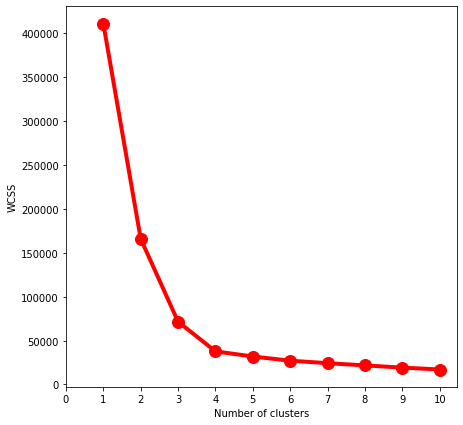

In [32]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [34]:

model.cluster_centers_

array([[-53.58083333, -62.39708333, -63.94      , -59.5525    ,
        -58.27      , -56.87541667, -52.31333333],
       [ -0.3925    ,  -8.88916667, -16.31666667,  -8.64      ,
         -5.835     ,  -3.91916667,   0.44      ],
       [-94.59666667, -94.4775    , -94.88833333, -95.0025    ,
        -95.32083333, -94.5625    , -94.38916667],
       [-32.44538462, -41.22461538, -41.62846154, -38.77384615,
        -37.52884615, -32.26346154, -31.45269231]])

In [35]:

model.labels_

array([1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [36]:

unique, counts = np.unique(model.labels_, return_counts=True)

In [37]:

dict_data = dict(zip(unique, counts))
dict_data

{0: 24, 1: 12, 2: 12, 3: 26}

In [38]:
dfinal["cluster"] = model.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



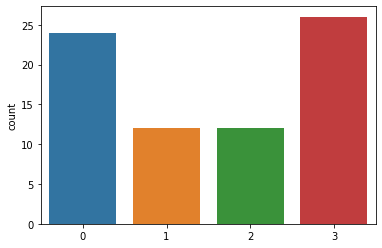

In [39]:
sns.countplot(y_clusters)


In [40]:
dfinal.head(50)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week,cluster
0,1.00,-1.00,3.00,-1.00,-2.00,1.00,4.00,1,1
1,-8.00,1.00,-2.00,-3.00,-1.00,1.00,0.00,2,1
2,-14.00,-9.00,-6.00,-7.00,-7.00,-4.00,-3.00,3,1
3,-56.00,-18.00,-19.00,-28.00,-36.00,-40.00,-47.00,4,3
4,-99.68,-83.00,-89.00,-96.03,-97.94,-98.96,-99.24,5,2
5,-99.83,-99.72,-99.75,-99.79,-99.83,-99.85,-99.89,6,2
6,-99.93,-99.87,-99.91,-99.92,-99.92,-99.94,-99.94,7,2
7,-99.94,-99.94,-99.94,-100.00,-99.94,-99.95,-99.95,8,2
8,-99.95,-99.94,-99.93,-99.93,-99.93,-99.93,-99.94,9,2
9,-99.85,-99.93,-99.92,-99.94,-99.94,-99.92,-99.94,10,2


**plot of cluster vs week**

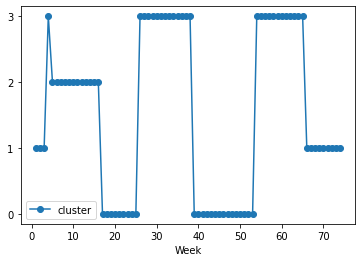

In [41]:
from matplotlib.pyplot import MultipleLocator
ax = plt.gca()

dfinal.plot(kind='line',x='Week',y='cluster',ax=ax,marker='o')
y_major_locator=MultipleLocator(1)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)
plt.show()

In [42]:
dg

,Date,Global,Day
0,2020-02-18,-1,Tuesday
1,2020-02-19,3,Wednesday
2,2020-02-20,-1,Thursday
3,2020-02-21,-2,Friday
4,2020-02-22,1,Saturday
...,...,...,...
513,2021-07-15,-2.16,Thursday
514,2021-07-16,-0.09,Friday
515,2021-07-17,2.82,Saturday
516,2021-07-18,3.7,Sunday


In [43]:

week=[]
i=1
for value in dg["Day"]:
    week.append(i)
    if value=='Tuesday': 
        i=i+1

dg["Week"] = week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
dg

,Date,Global,Day,Week
0,2020-02-18,-1,Tuesday,1
1,2020-02-19,3,Wednesday,2
2,2020-02-20,-1,Thursday,2
3,2020-02-21,-2,Friday,2
4,2020-02-22,1,Saturday,2
...,...,...,...,...
513,2021-07-15,-2.16,Thursday,75
514,2021-07-16,-0.09,Friday,75
515,2021-07-17,2.82,Saturday,75
516,2021-07-18,3.7,Sunday,75


In [45]:


dg.isnull().sum()

Date      0
Global    0
Day       0
Week      0
dtype: int64

In [46]:
dg.columns
dfm= pd.DataFrame(dg)

In [47]:
del dfm["Week"]
busiest_day = dfm.groupby(["Day"]).sum().sort_values("Global",ascending=False)
busiest_day = busiest_day.reset_index()
busiest_day

,Day,Global
0,Saturday,-3200.68
1,Sunday,-3269.39
2,Friday,-3385.64
3,Thursday,-3588.10
4,Wednesday,-3681.09
5,Monday,-3809.77
6,Tuesday,-3951.36


In [48]:
busiest_day.columns

Index(['Day', 'Global'], dtype='object')

In [49]:
busiest_day['Global']=busiest_day['Global'].div(518)
busiest_day

,Day,Global
0,Saturday,-6.178919
1,Sunday,-6.311564
2,Friday,-6.535985
3,Thursday,-6.926834
4,Wednesday,-7.106351
5,Monday,-7.354768
6,Tuesday,-7.628108


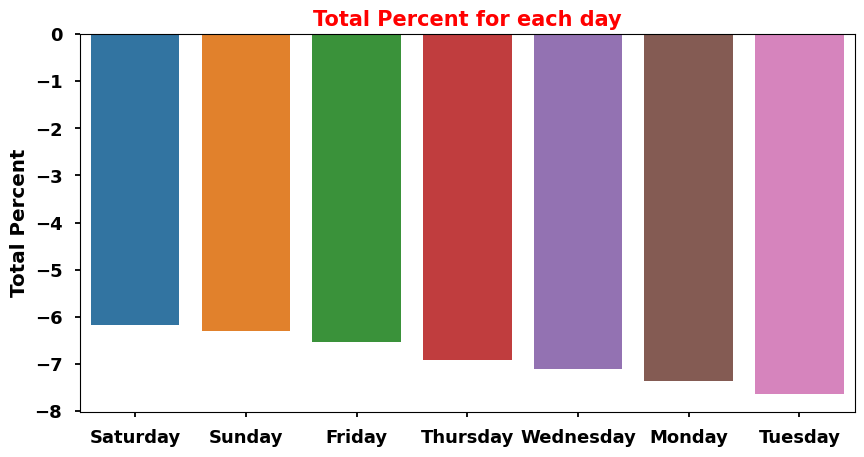

In [50]:

plt.figure(figsize=(10,5),dpi=100),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="Day",y="Global",data=busiest_day)

plt.title("Total Percent for each day", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Percent",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [51]:
dg['Date'] = pd.to_datetime(dg['Date'])
dg = dg.set_index('Date').sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Simple line plot for Global data**

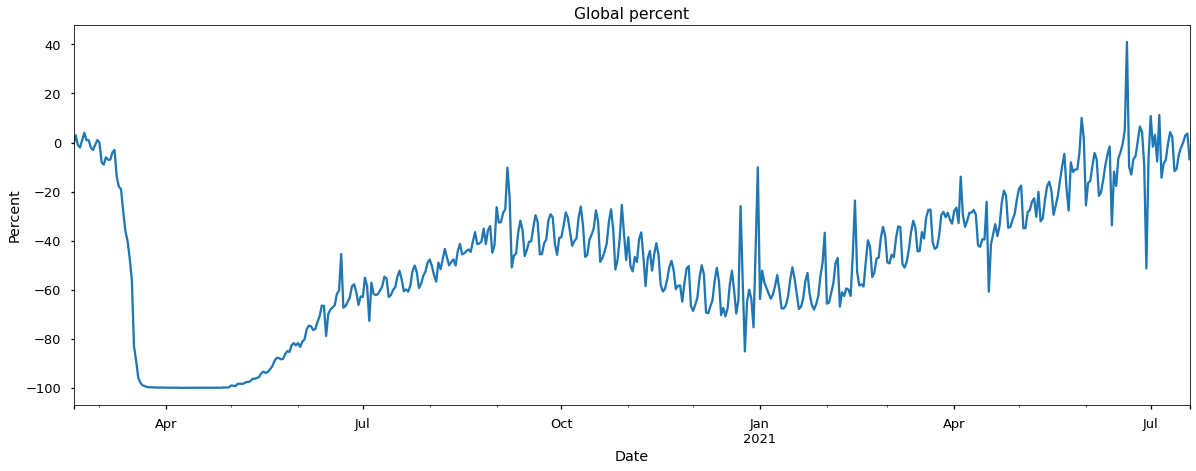

In [52]:
dg.plot(figsize=(20,7), legend=None, title='Global percent')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

**Matrix Profile analysis with 3 window sizes viz 4,7,12 days.**

In [53]:

windows = [
    ('4 Days', 4),
    ('7 Days', 8),
    ('12 Days', 12),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(dg['Global'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

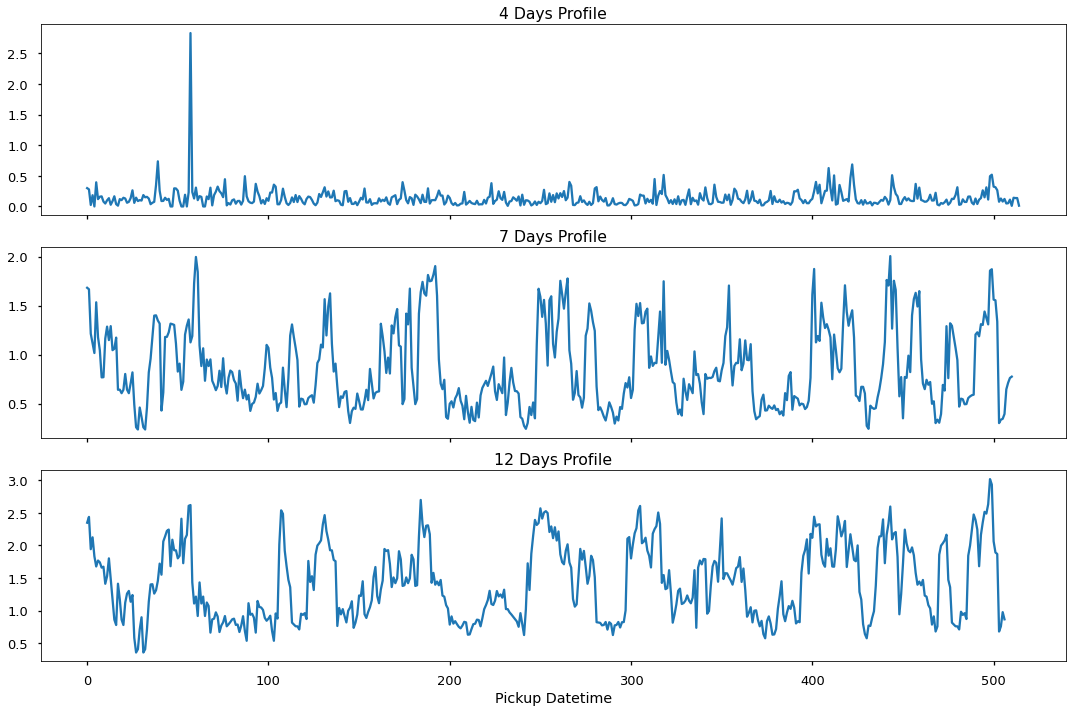

In [54]:
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,10))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

In [55]:
df

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baja California Sur,British Columbia,California,Colorado,Connecticut,District of Columbia,Florida,Georgia,Hawaii,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,Nevada,New Jersey,New Mexico,New South Wales,New York,North Carolina,Nuevo Leon,...,Columbus,Dallas,Denver,Dublin,Edmonton (CA),Fort Lauderdale,Hamburg,Honolulu,Houston,Indianapolis,Las Vegas,London,Los Angeles,Louisville,Miami,Miami Beach,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,Tampa,Toronto,Vancouver,Washington,Date
0,-1,-3,-5,11,2,-5,1,0,-14,2,0,-6,8,-2,1,8,-5,0,0,0,-4,21,8,39,11,-6,6,0,-8,-12,-11,32,30,-19,3,18,4,-1,4,-12,...,-10,6,-1,-5,8,-8,13,-3,-2,52,-22,4,7,28,0,19,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,7,-14,9,-5,2020-02-18
1,3,-6,0,4,0,-5,-1,4,7,10,1,-2,-3,2,-8,26,55,-3,4,2,4,13,9,2,14,2,70,7,-9,0,51,17,8,-18,70,-3,-7,11,1,-12,...,0,-4,-12,-1,17,-4,12,1,-8,14,-19,1,6,11,-8,-2,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,5,-8,1,57,2020-02-19
2,-1,-3,-3,3,4,-4,-2,0,1,2,8,-2,1,5,-4,1,8,-4,-6,4,-2,-15,0,-14,2,9,4,5,-1,-9,-15,-1,6,-1,-4,5,-1,1,-30,-10,...,-3,1,-9,7,3,-6,4,3,-3,-28,-6,2,9,7,-5,6,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,2,-9,7,9,2020-02-20
3,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-9,6,0,7,-3,0,-5,-5,5,-3,-8,5,-11,6,10,1,-7,-2,-12,-9,3,-1,1,-2,8,5,-4,-1,4,...,-6,3,14,0,4,-14,12,9,3,-15,0,3,1,0,1,7,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-4,-9,6,0,2020-02-21
4,1,0,-1,1,-3,-1,-1,2,8,5,-3,1,3,-2,1,-6,8,2,-2,4,6,3,-6,-4,11,2,8,-1,0,0,17,1,163,-4,3,-4,8,1,4,9,...,-8,-3,2,-3,2,-8,6,9,1,4,-4,-1,8,6,5,10,12,14,-1,3,10,10,3,2,2,0,-4,6,4,-6,-12,-9,10,-5,1,11,-4,7,9,2020-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,100.27,-18.53,-12.99,-3.66,27.45,-41.47,22.11,-3.96,-6.55,-28.04,6.1,31.17,-14.61,5.82,0.5,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,54.43,-0.29,-22.21,-79.51,-40.01,-8.89,-3.71,...,2.01,-8.53,-13.19,-17,18.47,29.06,8.49,-23.3,-12.28,-16.42,53.08,-36.16,-33.66,-4.81,28.77,15.6,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,13.84,-38.55,-45.31,-41.95,2021-07-21
520,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,81.14,-14.33,-13.36,-3.51,35.63,-39.54,20.99,-0.98,-8.01,-25.54,6.86,19.59,-12.89,4.84,0.01,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,47.65,12.43,-18.74,-79.82,-34.92,-10.69,-1.31,...,9.23,-3.84,-9.02,-14.12,4.88,48.88,8.52,-26.77,-7.29,-13.9,41.85,-30.22,-34.63,-3.95,42.86,33.35,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,16.69,-51.31,23.97,-38.32,-40.87,-40.09,2021-07-22
521,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,-15.1,14.2,2.72,62.9,-13.72,-9.75,-6.03,32.25,-28.18,12.13,0.91,-10.17,-19.94,12.74,22.51,-10.25,5.15,-0.13,-17.45,-6.58,-11.97,-3.99,-13.16,-17.8,19.62,39.84,7.03,-25.43,-78.37,-29.74,-8.98,-1.85,...,-1.57,-2.15,-9.65,-13.43,27.5,31.94,20.39,-21.15,4.86,-3.92,35.96,-22.3,-36.21,-0.34,17.97,7.67,-49.23,-38.76,56.21,21.18,1.74,-12.18,-46.74,5.23,-28.6,-12.23,-2.82,-46.12,-22.77,18.67,-1.91,-50.44,-1.54,9.1,-48.63,17.85,-26.92,-38.19,-29.21,2021-07-23
522,1.09,-18.15,-3.64,54.9,41.8,19.56,32.04,-2.39,-11.8,25.77,16.8,73.19,-11.44,-8.98,1.67,38.45,-28.75,11.96,6.45,-11.96,-17.74,7.36,27.24,-5.67,6.63,-0.22,-17.84,-0.07,-9.45,-6.49,-8.7,-19.52,30

**Matrix Profile and anomaly detection**

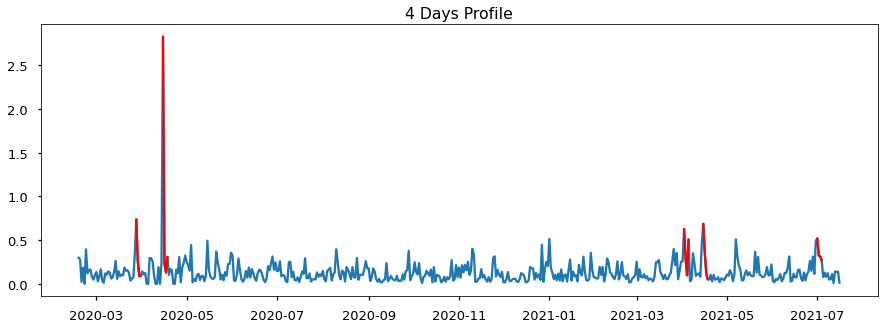

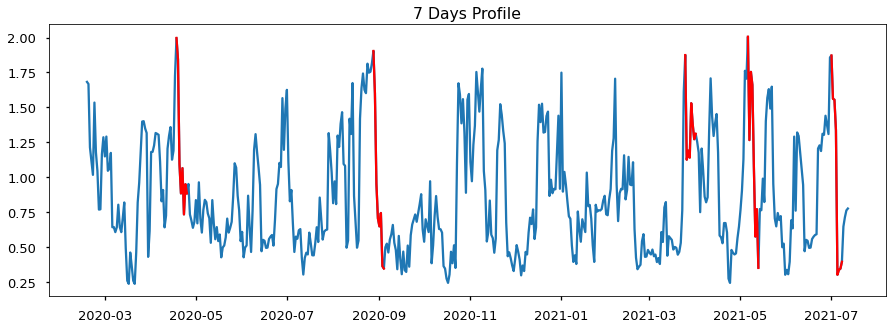

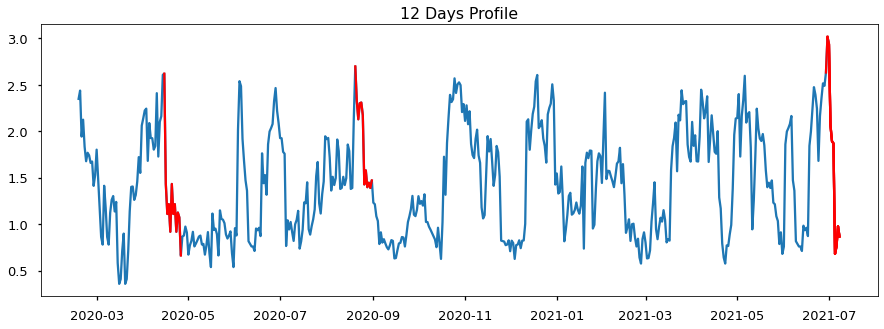

In [56]:
for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(15, 5))
    ax = plt.plot(dg.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = dg.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

In [57]:

key = '7 Days Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
dg[key] = mp_adjusted

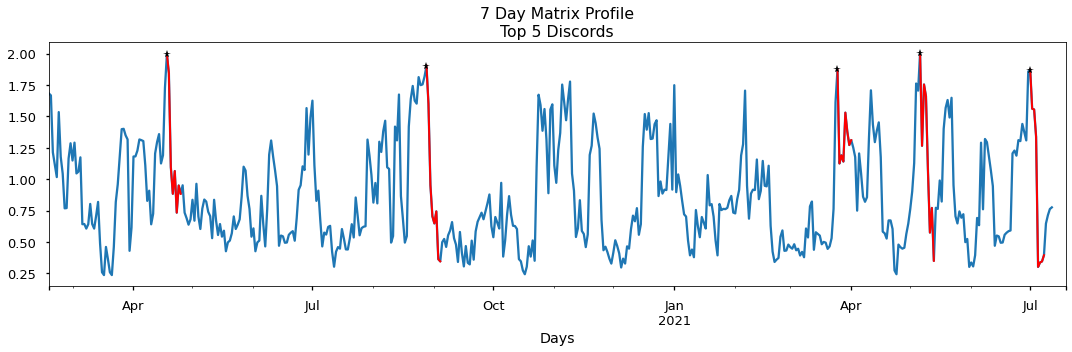

In [58]:
ax = dg[key].plot(title='7 Day Matrix Profile\nTop 5 Discords', figsize=(15,5))

for discord in profile['discords']:
    dg.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

dg.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [59]:
df

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baja California Sur,British Columbia,California,Colorado,Connecticut,District of Columbia,Florida,Georgia,Hawaii,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,Nevada,New Jersey,New Mexico,New South Wales,New York,North Carolina,Nuevo Leon,...,Columbus,Dallas,Denver,Dublin,Edmonton (CA),Fort Lauderdale,Hamburg,Honolulu,Houston,Indianapolis,Las Vegas,London,Los Angeles,Louisville,Miami,Miami Beach,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,Tampa,Toronto,Vancouver,Washington,Date
0,-1,-3,-5,11,2,-5,1,0,-14,2,0,-6,8,-2,1,8,-5,0,0,0,-4,21,8,39,11,-6,6,0,-8,-12,-11,32,30,-19,3,18,4,-1,4,-12,...,-10,6,-1,-5,8,-8,13,-3,-2,52,-22,4,7,28,0,19,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,7,-14,9,-5,2020-02-18
1,3,-6,0,4,0,-5,-1,4,7,10,1,-2,-3,2,-8,26,55,-3,4,2,4,13,9,2,14,2,70,7,-9,0,51,17,8,-18,70,-3,-7,11,1,-12,...,0,-4,-12,-1,17,-4,12,1,-8,14,-19,1,6,11,-8,-2,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,5,-8,1,57,2020-02-19
2,-1,-3,-3,3,4,-4,-2,0,1,2,8,-2,1,5,-4,1,8,-4,-6,4,-2,-15,0,-14,2,9,4,5,-1,-9,-15,-1,6,-1,-4,5,-1,1,-30,-10,...,-3,1,-9,7,3,-6,4,3,-3,-28,-6,2,9,7,-5,6,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,2,-9,7,9,2020-02-20
3,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-9,6,0,7,-3,0,-5,-5,5,-3,-8,5,-11,6,10,1,-7,-2,-12,-9,3,-1,1,-2,8,5,-4,-1,4,...,-6,3,14,0,4,-14,12,9,3,-15,0,3,1,0,1,7,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-4,-9,6,0,2020-02-21
4,1,0,-1,1,-3,-1,-1,2,8,5,-3,1,3,-2,1,-6,8,2,-2,4,6,3,-6,-4,11,2,8,-1,0,0,17,1,163,-4,3,-4,8,1,4,9,...,-8,-3,2,-3,2,-8,6,9,1,4,-4,-1,8,6,5,10,12,14,-1,3,10,10,3,2,2,0,-4,6,4,-6,-12,-9,10,-5,1,11,-4,7,9,2020-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,100.27,-18.53,-12.99,-3.66,27.45,-41.47,22.11,-3.96,-6.55,-28.04,6.1,31.17,-14.61,5.82,0.5,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,54.43,-0.29,-22.21,-79.51,-40.01,-8.89,-3.71,...,2.01,-8.53,-13.19,-17,18.47,29.06,8.49,-23.3,-12.28,-16.42,53.08,-36.16,-33.66,-4.81,28.77,15.6,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,13.84,-38.55,-45.31,-41.95,2021-07-21
520,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,81.14,-14.33,-13.36,-3.51,35.63,-39.54,20.99,-0.98,-8.01,-25.54,6.86,19.59,-12.89,4.84,0.01,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,47.65,12.43,-18.74,-79.82,-34.92,-10.69,-1.31,...,9.23,-3.84,-9.02,-14.12,4.88,48.88,8.52,-26.77,-7.29,-13.9,41.85,-30.22,-34.63,-3.95,42.86,33.35,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,16.69,-51.31,23.97,-38.32,-40.87,-40.09,2021-07-22
521,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,-15.1,14.2,2.72,62.9,-13.72,-9.75,-6.03,32.25,-28.18,12.13,0.91,-10.17,-19.94,12.74,22.51,-10.25,5.15,-0.13,-17.45,-6.58,-11.97,-3.99,-13.16,-17.8,19.62,39.84,7.03,-25.43,-78.37,-29.74,-8.98,-1.85,...,-1.57,-2.15,-9.65,-13.43,27.5,31.94,20.39,-21.15,4.86,-3.92,35.96,-22.3,-36.21,-0.34,17.97,7.67,-49.23,-38.76,56.21,21.18,1.74,-12.18,-46.74,5.23,-28.6,-12.23,-2.82,-46.12,-22.77,18.67,-1.91,-50.44,-1.54,9.1,-48.63,17.85,-26.92,-38.19,-29.21,2021-07-23
522,1.09,-18.15,-3.64,54.9,41.8,19.56,32.04,-2.39,-11.8,25.77,16.8,73.19,-11.44,-8.98,1.67,38.45,-28.75,11.96,6.45,-11.96,-17.74,7.36,27.24,-5.67,6.63,-0.22,-17.84,-0.07,-9.45,-6.49,-8.7,-19.52,30

**K means clustering with Whole dataset**

In [60]:
x = df[['Global',
 'Australia',
 'Canada',
 'Germany',
 'Ireland',
 'Mexico',
 'United Kingdom',
 'United States',
 'Alabama',
 'Alberta',
 'Arizona',
 'Baja California Sur',
 'British Columbia',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Illinois',
 'Indiana',
 'Jalisco',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maryland',
 'Massachusetts',
 'Mexico City',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'Nevada',
 'New Jersey',
 'New Mexico',
 'New South Wales',
 'New York',
 'North Carolina',
 'Nuevo Leon',
 'Ohio',
 'Oklahoma',
 'Ontario',
 'Oregon',
 'Pennsylvania',
 'Quebec',
 'Queensland',
 'Quintana Roo',
 'Rhode Island',
 'South Carolina',
 'Tennessee',
 'Texas',
 'Utah',
 'Victoria',
 'Virginia',
 'Washington',
 'Wisconsin',
 'Atlanta',
 'Austin',
 'Baltimore',
 'Boston',
 'Calgary',
 'Charlotte',
 'Chicago',
 'Cincinnati',
 'Ciudad de México',
 'Columbus',
 'Dallas',
 'Denver',
 'Dublin',
 'Edmonton (CA)',
 'Fort Lauderdale',
 'Hamburg',
 'Honolulu',
 'Houston',
 'Indianapolis',
 'Las Vegas',
 'London',
 'Los Angeles',
 'Louisville',
 'Miami',
 'Miami Beach',
 'Minneapolis',
 'Montréal',
 'München',
 'Naples (US)',
 'Nashville',
 'New Orleans',
 'New York',
 'Orlando',
 'Philadelphia',
 'Phoenix',
 'Pittsburgh',
 'Portland',
 'Raleigh',
 'San Antonio',
 'San Diego',
 'San Francisco',
 'San Pedro Garza García',
 'Scottsdale',
 'Seattle',
 'Tampa',
 'Toronto',
 'Vancouver',
 'Washington']].values

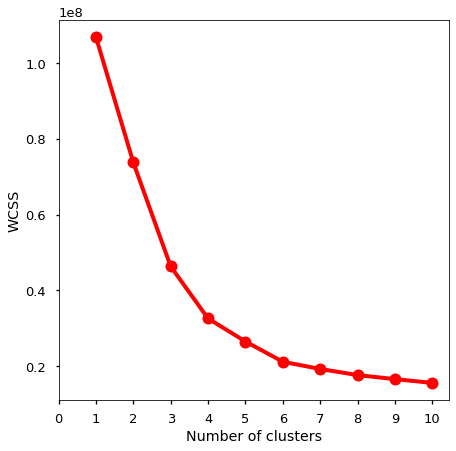

In [61]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [62]:
model = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [63]:
model.cluster_centers_

array([[-4.68588276e+01, -1.59584828e+01, -4.62183448e+01,
         3.73365517e+00, -1.33350345e+01, -5.67808276e+01,
        -2.30071724e+01, -5.08571034e+01, -3.62683448e+01,
        -3.29022759e+01, -4.39261379e+01, -2.96668276e+01,
        -3.69339310e+01, -5.61314483e+01, -3.25454483e+01,
        -2.26602759e+01, -7.48406897e+01, -4.11902759e+01,
        -4.49897931e+01, -8.88664828e+01, -5.91797931e+01,
        -3.54053103e+01, -3.70750345e+01, -4.53961379e+01,
        -4.09760690e+01, -4.75061379e+01, -6.03226897e+01,
        -5.05662759e+01, -6.89948966e+01, -3.47965517e+01,
        -3.88993103e+01, -4.93671034e+01, -4.21460690e+01,
        -4.11672414e+01, -3.38691724e+01, -5.92885517e+01,
         1.35317241e+01, -7.03884138e+01, -8.51615172e+01,
        -4.81184828e+01, -6.43729655e+01, -4.23392414e+01,
        -3.09749655e+01, -5.29886897e+01, -5.38386897e+01,
        -5.40868966e+01, -7.30184828e+01,  2.15687586e+01,
        -3.21340690e+01,  8.21075862e+00, -3.77381379e+0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



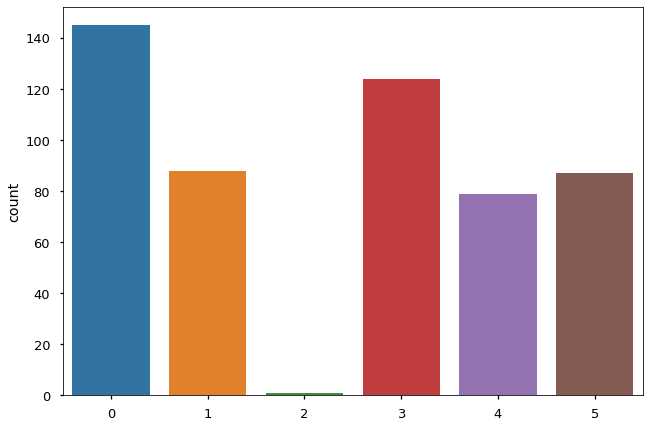

In [64]:
sns.countplot(y_clusters)

In [65]:
unique, counts = np.unique(model.labels_, return_counts=True)

In [66]:

dict_data = dict(zip(unique, counts))
dict_data

{0: 145, 1: 88, 2: 1, 3: 124, 4: 79, 5: 87}

In [67]:
df["cluster"] = model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df.tail(50)

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baja California Sur,British Columbia,California,Colorado,Connecticut,District of Columbia,Florida,Georgia,Hawaii,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,Nevada,New Jersey,New Mexico,New South Wales,New York,North Carolina,Nuevo Leon,...,Dallas,Denver,Dublin,Edmonton (CA),Fort Lauderdale,Hamburg,Honolulu,Houston,Indianapolis,Las Vegas,London,Los Angeles,Louisville,Miami,Miami Beach,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,Tampa,Toronto,Vancouver,Washington,Date,cluster
474,-6.86,16.05,-71.56,-37.88,-50.09,16.84,41.78,-3.44,-13.88,-63.51,24.07,87.22,-34.78,-8.99,-10.1,28.07,-31.58,36.01,4.28,-12.94,-20.21,7.25,31.19,-10.47,-3.44,-7.87,-20.16,-11.64,-10.34,-5.34,-11.76,-8.33,4.59,57.71,0.98,-12.19,58.21,-31.13,-8.52,-6.56,...,9.88,-16.44,-81.28,-37.82,64.59,-51.88,-33.49,23.74,-19.82,54.19,-12.25,-30.79,-25.35,55.47,30.28,-45.27,-74.04,-69.36,66.67,3.53,-21.78,-48.63,18.82,-34.51,10.76,-21.05,-50.42,-16.98,20.25,-8.98,-59.15,-14.87,37.29,-58.3,13.8,-99.73,-53.2,-31.74,2021-06-06,4
475,-21.73,-10.77,-78.39,-51.16,193.21,18.9,13.48,-17.2,-32.3,-79.16,20.58,64.6,-39.74,-26.13,-22.21,2.54,-61.01,28.53,-15.96,-9.08,-50.98,-3.32,17.48,-6.67,-16.26,-25.08,-29.13,-31.95,-24.67,-13.97,-21.67,-26.63,15.75,54.06,13.66,-13.76,-2.03,-46.05,-18.81,-1.81,...,-29.95,-38.41,26.13,-78.3,71.43,-63.28,-37.9,-3.19,-27.53,50.09,-42.69,-58.5,-34.58,-18.41,33.8,-61.26,-77.74,-11.1,38.64,-4.62,-49.4,-58.74,5.76,-32.32,14.18,-40.66,-47.87,-32.43,-1.18,-31.74,-73.15,3.44,9.77,-68.87,35.18,-100,-60.94,-60.77,2021-06-07,4
476,-20.26,42.68,-75.06,-3.38,49.52,10.65,11.84,-18.52,-25.69,-74.52,9.74,76.39,-40.15,-24.47,-18.24,2.6,-59.67,32.48,-12.78,-13.52,-40,-3.83,6.23,-14.17,-21.75,-26.85,-34.66,-31.87,-26.23,-19.61,-20.97,-19.93,8.05,47.67,-8.52,-37.24,80.77,-53.21,-18.97,0.62,...,-9.26,-32.69,-25.47,-70.7,61.28,-37.34,-35.43,-4.55,-33.02,46.3,-37.18,-55.91,-36.17,55.22,53.3,-60.25,-76.55,24.52,35.29,-8.42,-52.28,-64.19,-7.19,-50.54,-12.88,-44.83,-54.61,-34.87,7.58,-26.32,-69.44,-1.47,17.01,-67.7,22.36,-99.97,-55.3,-60,2021-06-08,4
477,-15.13,40.95,-75.52,-13.05,40.77,5.23,22.24,-12.14,-17.04,-80.72,15.49,75.66,-36.12,-16.38,-8.48,1.26,-55.55,26.46,-8.55,-5.12,-25.91,-2.63,2.32,-17.52,-3.93,-5.93,-32.78,-24.54,-26.05,-7.28,-16.19,-17.48,-0.54,58.36,-2.68,-15.26,100.04,-45.49,-16.21,-4.18,...,-6.27,-19.42,-34.96,-79.44,54.65,-42.25,-24.56,-0.77,-25.39,55.84,-30.03,-45.39,-27.75,73.45,58.02,-57.46,-68.6,6.53,28.76,-4.15,-29.45,-59.17,-17.58,-46.46,-4.22,-30.62,-42.91,-23.75,1.52,-12.25,-63.46,-0.57,29.39,-59.65,25.16,-99.98,-56.99,-54.94,2021-06-09,4
478,-9.19,41.54,-68.45,-2.25,24.68,9.81,25.53,-5.51,-5.54,-26.92,24.1,89.17,-37.9,-7.89,-2.6,14.32,-50.53,26.36,-5.74,-7.63,-22.98,3.86,12.63,-14.04,-2.87,-0.1,-33.25,-6.29,-25.21,-9.06,-12.27,-22.08,3.15,74.47,14.08,-6.11,94.43,-33.17,-12.09,-0.19,...,7.52,-7.74,-34.18,-28.51,61.1,-45.19,-28.13,2.42,-17.44,72.56,-25.93,-36.92,-19.14,-17.4,47.06,-57.77,-71.19,27.52,81.3,4.89,-16.89,-49.62,-8.08,-36.39,-1.13,-20.1,-44.99,-22.74,15.05,-9.68,-56.27,1.56,43.62,-64.6,31.97,-99.78,-59.71,-50.16,2021-06-10,4
479,-4.76,110.95,-39.89,22.81,31.38,10.36,37.31,-6.65,-10.83,0.96,21.96,62.62,-33.98,-9.03,-2.48,25.77,-43.76,25.07,-3.08,-10.65,-22.51,12.79,18.31,-16.13,0.05,2.58,-36.95,-10.22,-18.9,-10.23,-13.03,-22.89,2.74,61.32,-4.28,-18.32,91.44,-34.29,-9.75,8.06,...,8.14,-9.44,-29.22,4.08,43.58,-35.55,-26.41,7.34,-14.92,58.57,-17.63,-34.77,-19.2,57.79,64.57,-53.69,-59.53,61.6,59.67,22.27,-11.34,-49.49,6.56,-36.83,-0.29,-19.7,-46.65,-20.37,15.44,1.77,-51.75,10.35,39.57,-60.91,19.27,-68.32,-56.28,-43.73,2021-06-11,4
480,-1.6,128.9,-35.54,25.86,35.87,9.95,45.58,-5.13,-13.1,4.94,16.1,87.

In [69]:

week=[]
i=1
for value in df["cluster"]:
        week.append(i)
        i=i+1

df["Week"] = week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



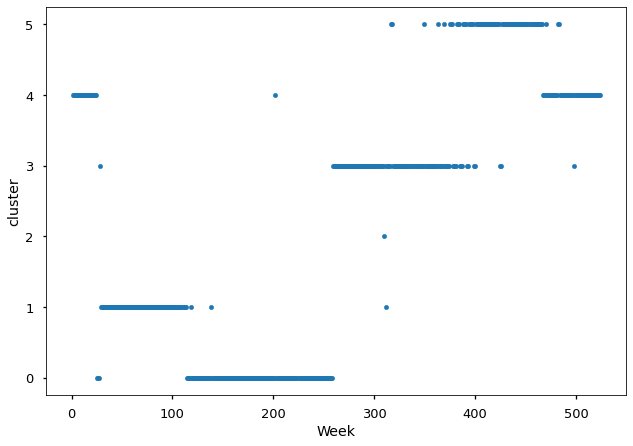

In [70]:
from matplotlib.pyplot import MultipleLocator
ax = plt.gca()

df.plot(kind='scatter',x='Week',y='cluster',ax=ax,marker='o')
y_major_locator=MultipleLocator(1)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)
plt.show()

**Taken two time series for consideration of multidimension motif discovery**

In [71]:
dfz1= pd.DataFrame()
dfz1['T1']=df['Global']
dfz1['T2']=df['Austin']

In [72]:
dfz1.columns

Index(['T1', 'T2'], dtype='object')

In [73]:
from IPython.display import IFrame

In [74]:


# !pip install scipy>=1.5
# !pip install stumpy

In [75]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

In [76]:
dfz1['T1']=dfz1['T1'].astype(float)
dfz1['T2']=dfz1['T2'].astype(float)

In [77]:
dfz1.columns

Index(['T1', 'T2'], dtype='object')

**Time series behaviour**

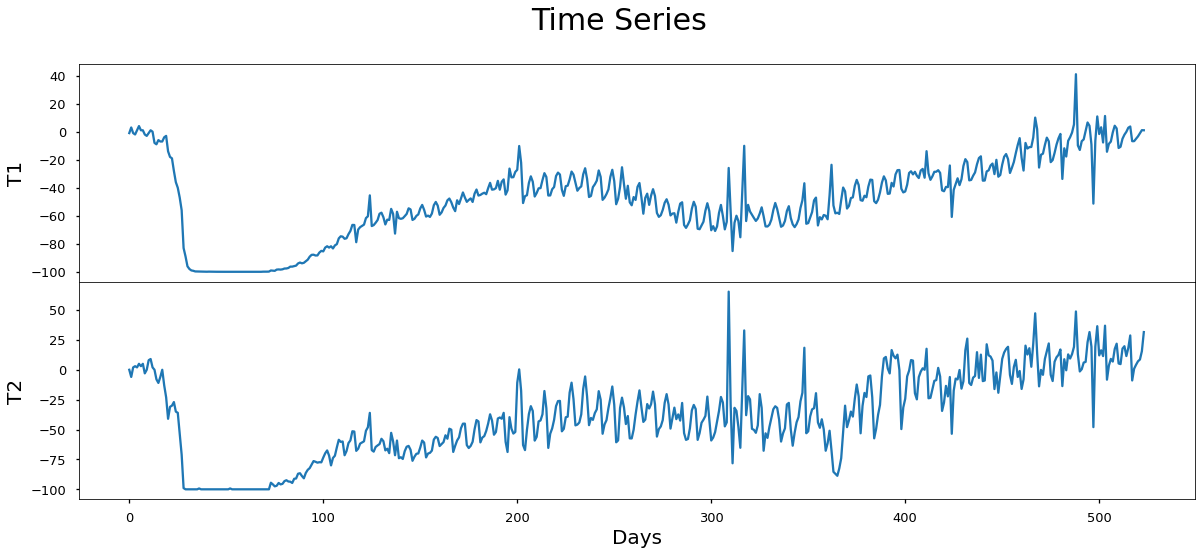

In [78]:
fig, axs = plt.subplots(dfz1.shape[1], sharex=True, gridspec_kw={'hspace': 0},figsize=(20,8))
plt.suptitle('Time Series', fontsize='30')

for i in range(dfz1.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Days', fontsize ='20')
    axs[i].plot(dfz1[f'T{i + 1}'])

plt.show()

In [79]:
m = 7
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in dfz1.columns:
    mps[dim_name] = stumpy.stump(dfz1[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

/usr/local/lib/python3.7/dist-packages/stumpy/stump.py:350: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



The motif pair matrix profile value in T1 is 0.2
The motif pair matrix profile value in T2 is 0.0


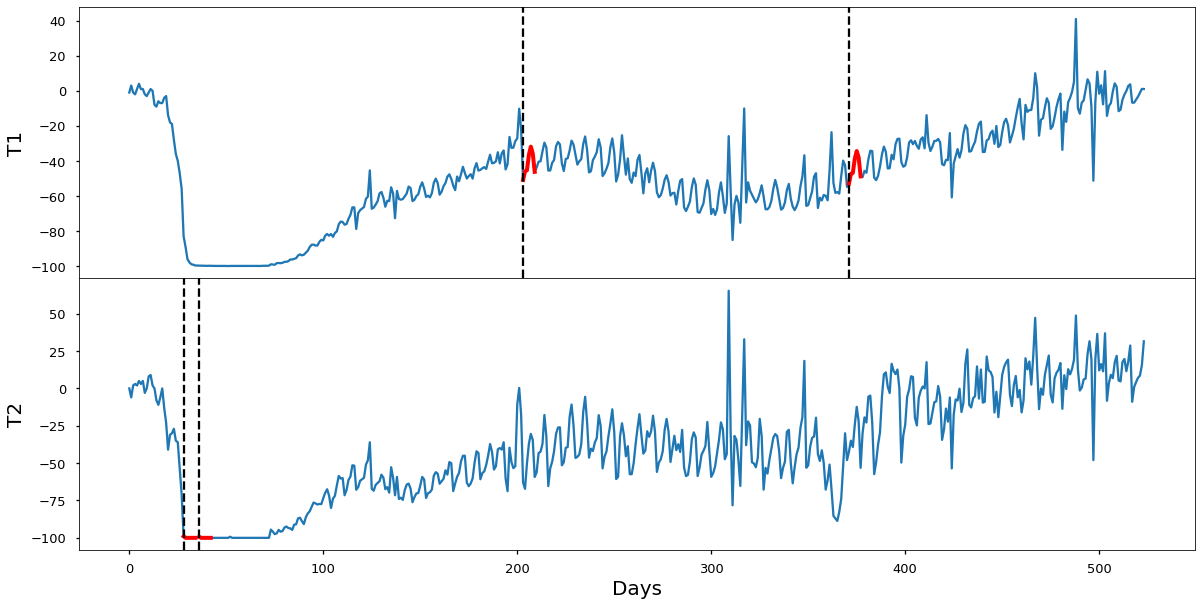

In [80]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0},figsize=(20,10))

for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='20')
    axs[i].plot(dfz1[dim_name])
    axs[i].set_xlabel('Days', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(dfz1[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')

plt.show()

In [81]:
mps, indices = stumpy.mstump(dfz1, m)

In [82]:

motifs_idx = np.argsort(mps, axis=1)[:, :2]

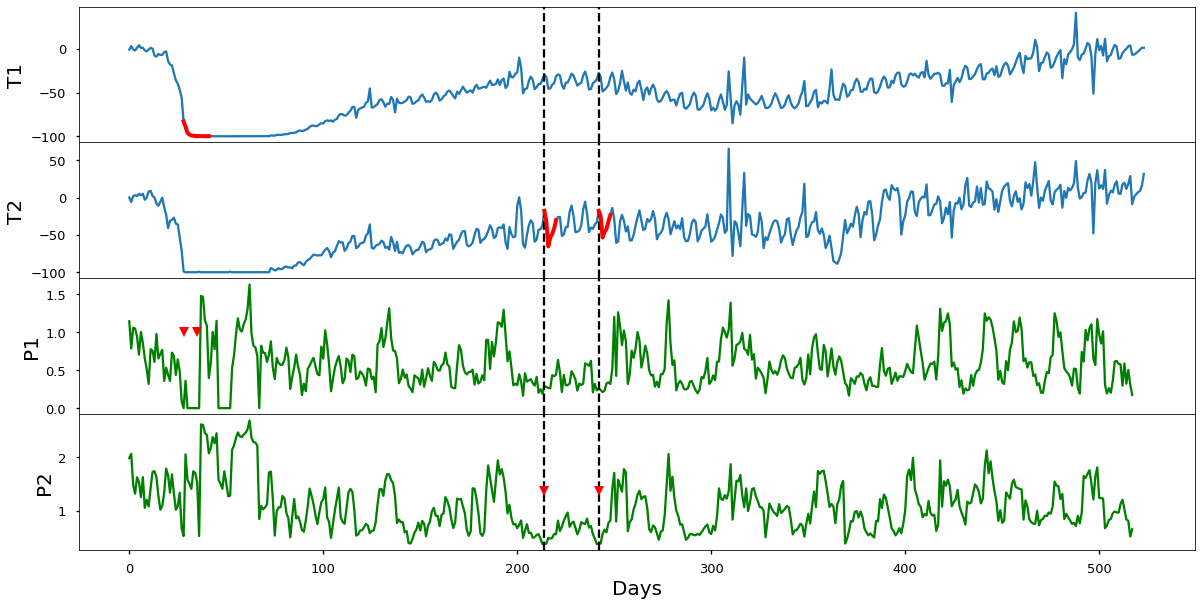

In [83]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0},figsize=(20,10))

for k, dim_name in enumerate(dfz1.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(dfz1[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='green')
    axs[k + mps.shape[0]].set_xlabel('Days', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    if dim_name == 'T2'or dim_name=='T1': 
        axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), dfz1[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
        axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), dfz1[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)
        axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='red')
        axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='red')
plt.show()

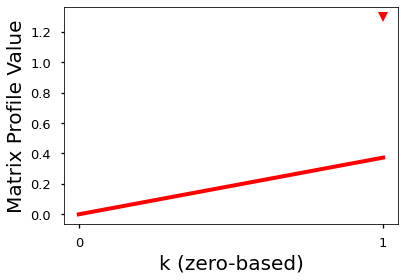

In [84]:
plt.plot(mps[range(mps.shape[0]), motifs_idx[:, 0]], c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Matrix Profile Value', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(1, 1.3, marker="v", markersize=10, color='red')
plt.show()

In [85]:
df

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baja California Sur,British Columbia,California,Colorado,Connecticut,District of Columbia,Florida,Georgia,Hawaii,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,Nevada,New Jersey,New Mexico,New South Wales,New York,North Carolina,Nuevo Leon,...,Denver,Dublin,Edmonton (CA),Fort Lauderdale,Hamburg,Honolulu,Houston,Indianapolis,Las Vegas,London,Los Angeles,Louisville,Miami,Miami Beach,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,Tampa,Toronto,Vancouver,Washington,Date,cluster,Week
0,-1,-3,-5,11,2,-5,1,0,-14,2,0,-6,8,-2,1,8,-5,0,0,0,-4,21,8,39,11,-6,6,0,-8,-12,-11,32,30,-19,3,18,4,-1,4,-12,...,-1,-5,8,-8,13,-3,-2,52,-22,4,7,28,0,19,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,7,-14,9,-5,2020-02-18,4,1
1,3,-6,0,4,0,-5,-1,4,7,10,1,-2,-3,2,-8,26,55,-3,4,2,4,13,9,2,14,2,70,7,-9,0,51,17,8,-18,70,-3,-7,11,1,-12,...,-12,-1,17,-4,12,1,-8,14,-19,1,6,11,-8,-2,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,5,-8,1,57,2020-02-19,4,2
2,-1,-3,-3,3,4,-4,-2,0,1,2,8,-2,1,5,-4,1,8,-4,-6,4,-2,-15,0,-14,2,9,4,5,-1,-9,-15,-1,6,-1,-4,5,-1,1,-30,-10,...,-9,7,3,-6,4,3,-3,-28,-6,2,9,7,-5,6,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,2,-9,7,9,2020-02-20,4,3
3,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-9,6,0,7,-3,0,-5,-5,5,-3,-8,5,-11,6,10,1,-7,-2,-12,-9,3,-1,1,-2,8,5,-4,-1,4,...,14,0,4,-14,12,9,3,-15,0,3,1,0,1,7,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-4,-9,6,0,2020-02-21,4,4
4,1,0,-1,1,-3,-1,-1,2,8,5,-3,1,3,-2,1,-6,8,2,-2,4,6,3,-6,-4,11,2,8,-1,0,0,17,1,163,-4,3,-4,8,1,4,9,...,2,-3,2,-8,6,9,1,4,-4,-1,8,6,5,10,12,14,-1,3,10,10,3,2,2,0,-4,6,4,-6,-12,-9,10,-5,1,11,-4,7,9,2020-02-22,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,100.27,-18.53,-12.99,-3.66,27.45,-41.47,22.11,-3.96,-6.55,-28.04,6.1,31.17,-14.61,5.82,0.5,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,54.43,-0.29,-22.21,-79.51,-40.01,-8.89,-3.71,...,-13.19,-17,18.47,29.06,8.49,-23.3,-12.28,-16.42,53.08,-36.16,-33.66,-4.81,28.77,15.6,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,13.84,-38.55,-45.31,-41.95,2021-07-21,4,520
520,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,81.14,-14.33,-13.36,-3.51,35.63,-39.54,20.99,-0.98,-8.01,-25.54,6.86,19.59,-12.89,4.84,0.01,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,47.65,12.43,-18.74,-79.82,-34.92,-10.69,-1.31,...,-9.02,-14.12,4.88,48.88,8.52,-26.77,-7.29,-13.9,41.85,-30.22,-34.63,-3.95,42.86,33.35,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,16.69,-51.31,23.97,-38.32,-40.87,-40.09,2021-07-22,4,521
521,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,-15.1,14.2,2.72,62.9,-13.72,-9.75,-6.03,32.25,-28.18,12.13,0.91,-10.17,-19.94,12.74,22.51,-10.25,5.15,-0.13,-17.45,-6.58,-11.97,-3.99,-13.16,-17.8,19.62,39.84,7.03,-25.43,-78.37,-29.74,-8.98,-1.85,...,-9.65,-13.43,27.5,31.94,20.39,-21.15,4.86,-3.92,35.96,-22.3,-36.21,-0.34,17.97,7.67,-49.23,-38.76,56.21,21.18,1.74,-12.18,-46.74,5.23,-28.6,-12.23,-2.82,-46.12,-22.77,18.67,-1.91,-50.44,-1.54,9.1,-48.63,17.85,-26.92,-38.19,-29.21,2021-07-23,4,522
522,1.09,-18.15,-3.64,54.9,41.8,19.56,32.04,-2.39,-11.8,25.77,16.8,73.19,-11.44,-8.98,1.67,38.45,-28.75,11.96,6.45,-11.96,-17.74,7.36,27.24,-5.67,6.63,-0.22,-17.84,-0.07,-9.45,-6.49,-8.7,-19.52,30.59,39.36,1.23,-24.46,-72.

**Country Analysis**

In [86]:
d=dff=df.loc[:, 'Global':'United States']

In [87]:
dff

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States
0,-1,-3,-5,11,2,-5,1,0
1,3,-6,0,4,0,-5,-1,4
2,-1,-3,-3,3,4,-4,-2,0
3,-2,-1,-2,5,1,-3,0,-1
4,1,0,-1,1,-3,-1,-1,2
...,...,...,...,...,...,...,...,...
519,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35
520,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19
521,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98
522,1.09,-18.15,-3.64,54.9,41.8,19.56,32.04,-2.39


In [88]:
d=d.rename(columns={'Global':'T1','Australia':'T2','Canada':'T3','Germany':'T4','Ireland':'T5','Mexico':'T6','United Kingdom':'T7','United States':'T8'})

In [89]:
d.head()

,T1,T2,T3,T4,T5,T6,T7,T8
0,-1,-3,-5,11,2,-5,1,0
1,3,-6,0,4,0,-5,-1,4
2,-1,-3,-3,3,4,-4,-2,0
3,-2,-1,-2,5,1,-3,0,-1
4,1,0,-1,1,-3,-1,-1,2


In [90]:
dff

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States
0,-1,-3,-5,11,2,-5,1,0
1,3,-6,0,4,0,-5,-1,4
2,-1,-3,-3,3,4,-4,-2,0
3,-2,-1,-2,5,1,-3,0,-1
4,1,0,-1,1,-3,-1,-1,2
...,...,...,...,...,...,...,...,...
519,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35
520,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19
521,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98
522,1.09,-18.15,-3.64,54.9,41.8,19.56,32.04,-2.39


**Time series for different countries**

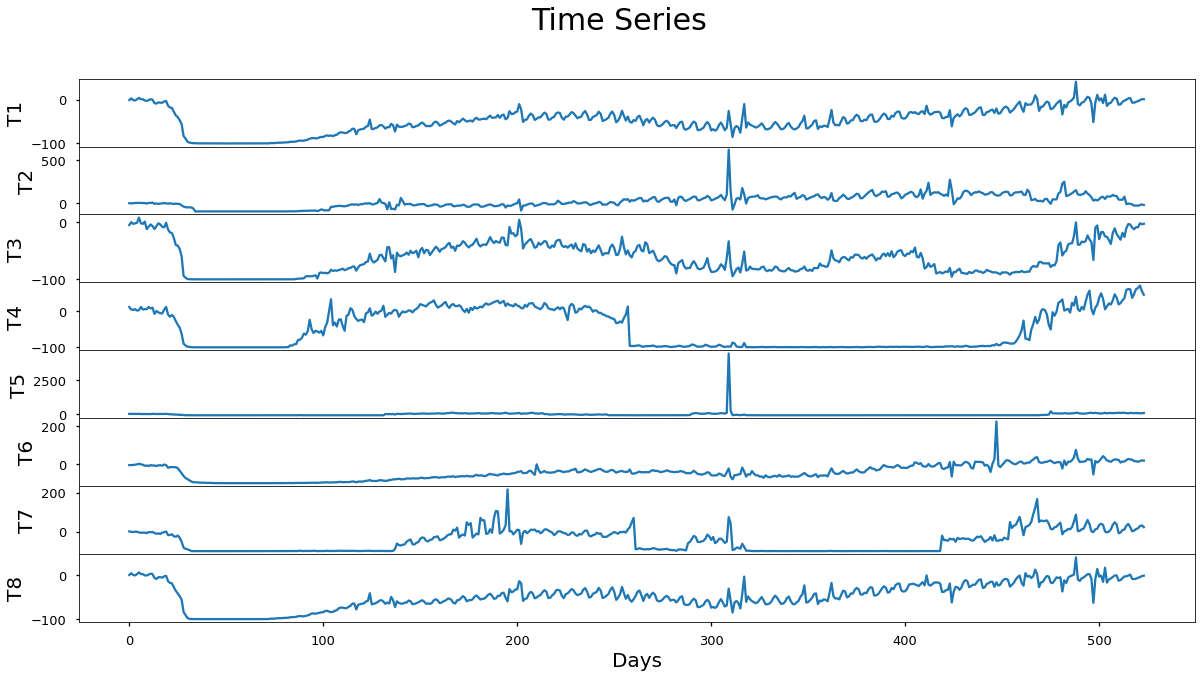

In [91]:
fig, axs = plt.subplots(d.shape[1], sharex=True, gridspec_kw={'hspace': 0},figsize=(20,10))
plt.suptitle('Time Series', fontsize='30')

for i in range(d.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Days', fontsize ='20')
    axs[i].plot(d[f'T{i + 1}'])

plt.show()

In [92]:
dff['Date']=df['Date']
dff

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Date
0,-1,-3,-5,11,2,-5,1,0,2020-02-18
1,3,-6,0,4,0,-5,-1,4,2020-02-19
2,-1,-3,-3,3,4,-4,-2,0,2020-02-20
3,-2,-1,-2,5,1,-3,0,-1,2020-02-21
4,1,0,-1,1,-3,-1,-1,2,2020-02-22
...,...,...,...,...,...,...,...,...,...
519,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,2021-07-21
520,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,2021-07-22
521,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,2021-07-23
522,1.09,-18.15,-3.64,54.9,41.8,19.56,32.04,-2.39,2021-07-24


In [93]:

dff.columns

Index(['Global', 'Australia', 'Canada', 'Germany', 'Ireland', 'Mexico',
       'United Kingdom', 'United States', 'Date'],
      dtype='object')

In [94]:

x = dff[['Global', 'Australia', 'Canada', 'Germany', 'Ireland', 'Mexico',
       'United Kingdom', 'United States']].values


**Clustering**

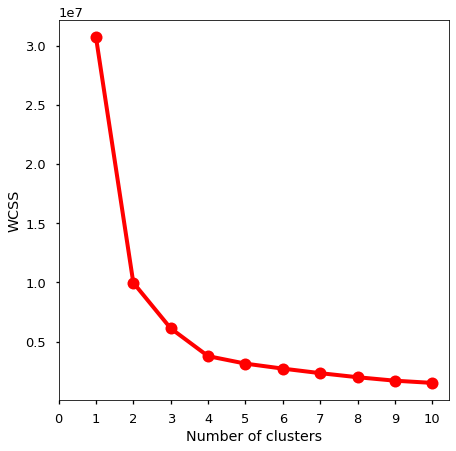

In [95]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [96]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [97]:
model.cluster_centers_

array([[-2.96711060e+01,  9.90502304e+00, -3.80968203e+01,
         3.59930876e+00,  1.12294931e+01, -2.76097235e+01,
         6.98847926e-01, -3.29051613e+01],
       [-2.58700000e+01,  6.26800000e+02, -3.34300000e+01,
        -9.76500000e+01,  4.46597000e+03, -2.24200000e+01,
         7.42500000e+01, -3.09200000e+01],
       [-4.44323316e+01,  8.11758549e+01, -7.35952332e+01,
        -9.60644041e+01, -9.27703627e+01, -2.96207254e+01,
        -7.36297927e+01, -4.03812435e+01],
       [-8.72582301e+01, -7.24880531e+01, -9.07601770e+01,
        -6.76075221e+01, -9.51484071e+01, -9.35492920e+01,
        -9.83959292e+01, -8.68391150e+01]])

In [98]:

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



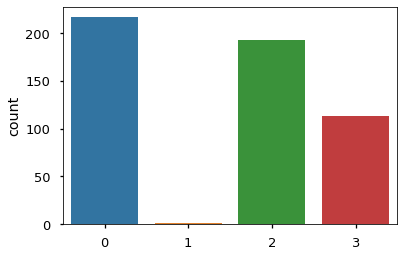

In [99]:


sns.countplot(y_clusters)

In [100]:
unique, counts = np.unique(model.labels_, return_counts=True)

In [101]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 217, 1: 1, 2: 193, 3: 113}

In [102]:

dff["cluster"] = model.labels_

In [103]:

week=[]
i=1
for value in dff["cluster"]:
        week.append(i)
        i=i+1

dff["Week"] = week

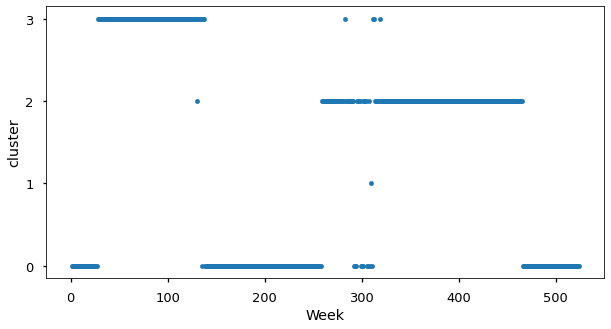

In [104]:
from matplotlib.pyplot import MultipleLocator
ax = plt.gca()

dff.plot(kind='scatter',x='Week',y='cluster',ax=ax,marker='o',figsize=(10,5))
y_major_locator=MultipleLocator(1)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)
plt.show()

In [105]:
del dff["Date"]
del dff['cluster']
del dff['Week']


In [106]:
dff=dff.T

In [107]:
dff.sum(axis=1)

Global           -24900.12
Australia         10251.98
Canada           -32760.22
Germany          -25496.68
Ireland          -21753.68
Mexico           -22301.60
United Kingdom   -25103.39
United States    -24777.74
dtype: float64

In [108]:
dff["Sum"]=dff.sum(axis=1)

In [109]:
dff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,Sum
Global,-1,3,-1,-2,1,4,1,1,-2,-3,-1,1,0,-8,-9,-6,-7,-7,-4,-3,-14,-18,-19,-28,-36,-40,-47,-56,-83,-89,-96.03,-97.94,-98.96,-99.24,-99.68,-99.72,-99.75,-99.79,-99.83,-99.85,...,-3.95,-0.62,5.17,41,-9.83,-13.05,-6.78,-5.5,0.48,6.56,4.19,-9.22,-51.32,-6.47,10.88,-1.66,3.13,-7.71,11.21,-14.31,-8.65,-7.07,-0.49,4.24,2.29,-11.63,-10.78,-5.05,-2.16,-0.09,2.82,3.7,-6.77,-6.77,-5,-3.33,-1.09,1.09,1.01,-24900.12
Australia,-3,-6,-3,-1,0,0,0,-2,-2,-7,0,-1,4,-12,-6,-12,-8,-6,-3,-4,-10,-4,-10,-12,-8,-11,-12,-30,-43,-50,-53,-51.67,-53.61,-65.53,-99.82,-100,-100,-100,-100,-100,...,99.89,114.11,133.01,150.37,100.68,92.53,99.64,105.91,137.42,111.08,92.98,65.49,26.97,38.4,28.42,43.83,67.51,71.58,46.42,77.2,73.72,75.64,94.09,82.01,81.55,39.4,37.51,37.75,74.41,-13.82,-7.35,-11.27,-17.03,-32.33,-30.71,-32.75,-25.46,-18.15,-24.05,10251.98
Canada,-5,0,-3,-2,-1,8,-2,-3,1,-12,-8,-4,-7,-12,-7,-2,-4,-8,-9,-1,-13,-18,-19,-28,-40,-41,-47,-60,-94,-97,-99.47,-99.72,-99.89,-99.94,-99.97,-99.99,-99.97,-99.98,-99.98,-100,...,-37.11,-37.01,-24.31,-0.4,-39.33,-39.42,-33.9,-35.08,-32.98,-23.16,-30.17,-35.06,-66.16,-9.63,-5.78,-29.7,-17.45,-17.17,-24.79,-25.68,-31.22,-38.06,-18.99,-10.87,-20.82,-25.93,-30.69,-18.78,-25.87,-10.4,-3.27,-4.18,-9.5,-12.42,-8.81,-8.95,-1.86,-3.64,-2.94,-32760.22
Germany,11,4,3,5,1,2,11,4,5,5,11,7,9,-8,0,-4,-6,-7,4,11,-10,-16,-11,-17,-28,-38,-46,-63,-90,-95,-98.36,-98.79,-99.78,-99.96,-100,-100,-100,-100,-100,-100,...,-4.5,22.35,15.04,39.18,5.25,-0.31,10.91,4.19,25.7,45,56.03,5.56,-9.27,9.34,16.3,36.37,48.59,33.2,4.59,12.71,20.79,17.58,29.51,45.9,36.75,18.32,21.44,29.46,35.39,57.95,60.22,59.52,36.07,47.12,60.43,63.09,69.96,54.9,44.51,-25496.68
Ireland,2,0,4,1,-3,4,-9,-8,-10,-2,-10,-13,10,-6,-7,-1,-15,-13,-5,4,-10,-28,-27,-46,-51,-52,-75,-70,-86,-97,-98.55,-99.08,-98.76,-98.31,-100,-99.55,-100,-100,-100,-100,...,26.72,49.77,43.83,88.65,73.12,31.42,27.91,19.57,31.86,44.11,80.28,76.11,58.35,81.67,54.06,44.04,24.91,47.37,80.93,36.43,67.49,64.2,61.41,56.11,72.85,86.29,73.97,78.93,80.49,58.14,41.76,78.27,63.83,52.67,66.53,59.38,51.59,41.8,73.68,-21753.68
Mexico,-5,-5,-4,-3,-1,2,-1,-3,-9,-7,-10,-5,-7,-7,-10,-6,-6,-8,-2,-5,-19,-16,-15,-16,-16,-21,-35,-48,-62,-73,-78.41,-85.12,-90.81,-95.2,-94.6,-95.81,-96.6,-97.33,-97.12,-97.09,...,12.47,20.91,35.57,75.31,29.15,11.21,12.81,13.18,16.43,27.47,23.13,25,-54.28,17.02,8.64,15.92,29.05,42.17,32.57,19.28,16.24,11.97,20.12,25.18,23.81,22.7,8.29,13.9,13.26,21.64,27.28,24.64,23.32,15.84,15.16,12.53,16.15,19.56,18.74,-22301.60
United Kingdom,1,-1,-2,0,-1,-4,-6,-5,-5,-8,-2,-3,-2,-7,-11,-9,-12,-5,-3,1,-18,-17,-14,-24,-26,-20,-31,-52,-82,-88,-91.08,-93.93,-99.96,-99.99,-100,-100,-100,-100,-100,-100,...,12.14,23.06,52.21,86.53,2.24,4.41,12.18,15.87,37.22,59.54,38.21,1.16,-1.92,11.7,14.74,34.13,40.24,34.17,0.78,-3.98,0.49,11.27,34.72,47.77,37.25,-8.42,-4.4,8,10.61,30.37,39.38,23.46,1.65,5.48,12.93,17.22,28.57,32.04,23.03,-25103.39
United States,0,4,0,-1,2,6,2,2,-1,-1,1,3,2,-7,-9,-5,-5,-6,-3,-2,-14,-18,-19,-28,-36,-42,-48,-56,-84,-91,-97.54,-99.35,-99.89,-99.93,-99.97,-99.97,-99.98,-99.98,-99.99,-99.98,...,-2.81,-1.22,1.22,40.01,-9.98,-13.46,-7.29,-5.45,-1.77,1.77,1.94,-8.79,-63.23,-9.5,13.65,-3.65,-1.35,-15.52,16.55,-17.32,-10.09,-7.82,-4.32,-1.08,-0.92,-12.98,-11.46,-7.05,-3.29,-2.99,-1.34,1,-8.98,-9.26,-8.35,-6.19,-4.98,-2.39,-1.64,-24777.74


In [110]:

dfi = pd.DataFrame(index=dff.index)
dfi['Total Percent']=dff['Sum']

In [111]:
dfi

,Total Percent
Global,-24900.12
Australia,10251.98
Canada,-32760.22
Germany,-25496.68
Ireland,-21753.68
Mexico,-22301.60
United Kingdom,-25103.39
United States,-24777.74


In [112]:
dfi['Country'] = dfi.index
dfi=dfi.reset_index(level=0, inplace=False)

In [113]:
del dfi['index']

In [114]:
dfi

,Total Percent,Country
0,-24900.12,Global
1,10251.98,Australia
2,-32760.22,Canada
3,-25496.68,Germany
4,-21753.68,Ireland
5,-22301.60,Mexico
6,-25103.39,United Kingdom
7,-24777.74,United States


In [115]:
dfi['Total Percent']=dfi['Total Percent'].div(525)
dfi

,Total Percent,Country
0,-47.428800,Global
1,19.527581,Australia
2,-62.400419,Canada
3,-48.565105,Germany
4,-41.435581,Ireland
5,-42.479238,Mexico
6,-47.815981,United Kingdom
7,-47.195695,United States


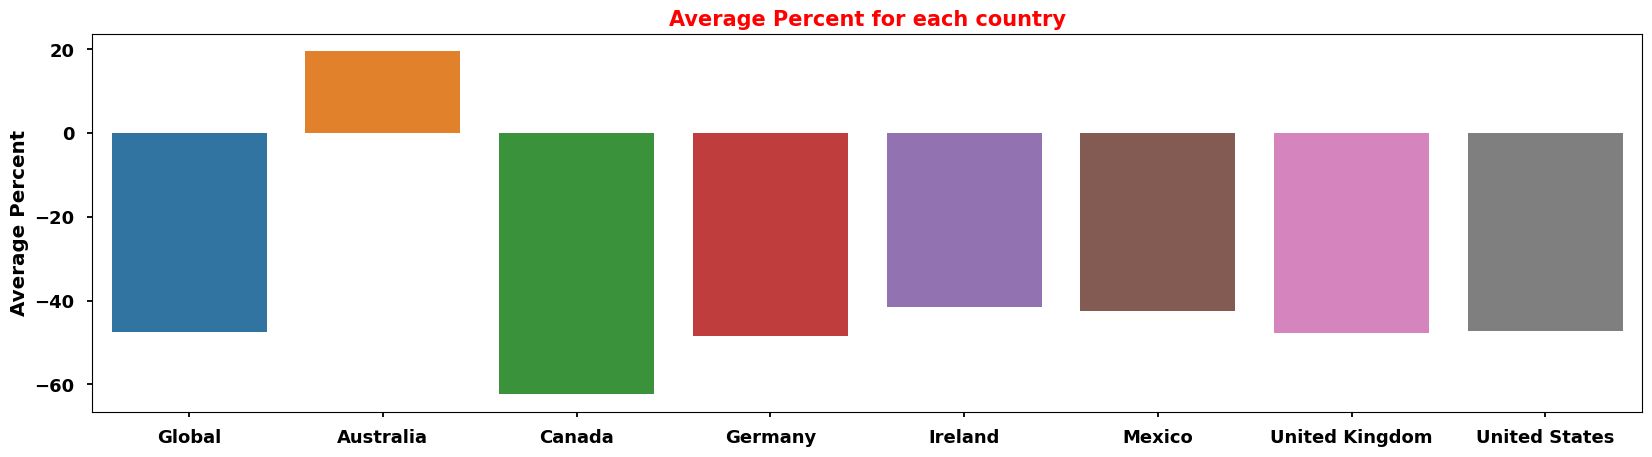

In [116]:
plt.figure(figsize=(20,5),dpi=100),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="Country",y="Total Percent",data=dfi)

plt.title("Average Percent for each country", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Average Percent",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [117]:
from sklearn.feature_selection import mutual_info
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.mutual_info module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



<module 'sklearn.feature_selection.mutual_info' from '/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/mutual_info.py'>

In [118]:
dff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,Sum
Global,-1,3,-1,-2,1,4,1,1,-2,-3,-1,1,0,-8,-9,-6,-7,-7,-4,-3,-14,-18,-19,-28,-36,-40,-47,-56,-83,-89,-96.03,-97.94,-98.96,-99.24,-99.68,-99.72,-99.75,-99.79,-99.83,-99.85,...,-3.95,-0.62,5.17,41,-9.83,-13.05,-6.78,-5.5,0.48,6.56,4.19,-9.22,-51.32,-6.47,10.88,-1.66,3.13,-7.71,11.21,-14.31,-8.65,-7.07,-0.49,4.24,2.29,-11.63,-10.78,-5.05,-2.16,-0.09,2.82,3.7,-6.77,-6.77,-5,-3.33,-1.09,1.09,1.01,-24900.12
Australia,-3,-6,-3,-1,0,0,0,-2,-2,-7,0,-1,4,-12,-6,-12,-8,-6,-3,-4,-10,-4,-10,-12,-8,-11,-12,-30,-43,-50,-53,-51.67,-53.61,-65.53,-99.82,-100,-100,-100,-100,-100,...,99.89,114.11,133.01,150.37,100.68,92.53,99.64,105.91,137.42,111.08,92.98,65.49,26.97,38.4,28.42,43.83,67.51,71.58,46.42,77.2,73.72,75.64,94.09,82.01,81.55,39.4,37.51,37.75,74.41,-13.82,-7.35,-11.27,-17.03,-32.33,-30.71,-32.75,-25.46,-18.15,-24.05,10251.98
Canada,-5,0,-3,-2,-1,8,-2,-3,1,-12,-8,-4,-7,-12,-7,-2,-4,-8,-9,-1,-13,-18,-19,-28,-40,-41,-47,-60,-94,-97,-99.47,-99.72,-99.89,-99.94,-99.97,-99.99,-99.97,-99.98,-99.98,-100,...,-37.11,-37.01,-24.31,-0.4,-39.33,-39.42,-33.9,-35.08,-32.98,-23.16,-30.17,-35.06,-66.16,-9.63,-5.78,-29.7,-17.45,-17.17,-24.79,-25.68,-31.22,-38.06,-18.99,-10.87,-20.82,-25.93,-30.69,-18.78,-25.87,-10.4,-3.27,-4.18,-9.5,-12.42,-8.81,-8.95,-1.86,-3.64,-2.94,-32760.22
Germany,11,4,3,5,1,2,11,4,5,5,11,7,9,-8,0,-4,-6,-7,4,11,-10,-16,-11,-17,-28,-38,-46,-63,-90,-95,-98.36,-98.79,-99.78,-99.96,-100,-100,-100,-100,-100,-100,...,-4.5,22.35,15.04,39.18,5.25,-0.31,10.91,4.19,25.7,45,56.03,5.56,-9.27,9.34,16.3,36.37,48.59,33.2,4.59,12.71,20.79,17.58,29.51,45.9,36.75,18.32,21.44,29.46,35.39,57.95,60.22,59.52,36.07,47.12,60.43,63.09,69.96,54.9,44.51,-25496.68
Ireland,2,0,4,1,-3,4,-9,-8,-10,-2,-10,-13,10,-6,-7,-1,-15,-13,-5,4,-10,-28,-27,-46,-51,-52,-75,-70,-86,-97,-98.55,-99.08,-98.76,-98.31,-100,-99.55,-100,-100,-100,-100,...,26.72,49.77,43.83,88.65,73.12,31.42,27.91,19.57,31.86,44.11,80.28,76.11,58.35,81.67,54.06,44.04,24.91,47.37,80.93,36.43,67.49,64.2,61.41,56.11,72.85,86.29,73.97,78.93,80.49,58.14,41.76,78.27,63.83,52.67,66.53,59.38,51.59,41.8,73.68,-21753.68
Mexico,-5,-5,-4,-3,-1,2,-1,-3,-9,-7,-10,-5,-7,-7,-10,-6,-6,-8,-2,-5,-19,-16,-15,-16,-16,-21,-35,-48,-62,-73,-78.41,-85.12,-90.81,-95.2,-94.6,-95.81,-96.6,-97.33,-97.12,-97.09,...,12.47,20.91,35.57,75.31,29.15,11.21,12.81,13.18,16.43,27.47,23.13,25,-54.28,17.02,8.64,15.92,29.05,42.17,32.57,19.28,16.24,11.97,20.12,25.18,23.81,22.7,8.29,13.9,13.26,21.64,27.28,24.64,23.32,15.84,15.16,12.53,16.15,19.56,18.74,-22301.60
United Kingdom,1,-1,-2,0,-1,-4,-6,-5,-5,-8,-2,-3,-2,-7,-11,-9,-12,-5,-3,1,-18,-17,-14,-24,-26,-20,-31,-52,-82,-88,-91.08,-93.93,-99.96,-99.99,-100,-100,-100,-100,-100,-100,...,12.14,23.06,52.21,86.53,2.24,4.41,12.18,15.87,37.22,59.54,38.21,1.16,-1.92,11.7,14.74,34.13,40.24,34.17,0.78,-3.98,0.49,11.27,34.72,47.77,37.25,-8.42,-4.4,8,10.61,30.37,39.38,23.46,1.65,5.48,12.93,17.22,28.57,32.04,23.03,-25103.39
United States,0,4,0,-1,2,6,2,2,-1,-1,1,3,2,-7,-9,-5,-5,-6,-3,-2,-14,-18,-19,-28,-36,-42,-48,-56,-84,-91,-97.54,-99.35,-99.89,-99.93,-99.97,-99.97,-99.98,-99.98,-99.99,-99.98,...,-2.81,-1.22,1.22,40.01,-9.98,-13.46,-7.29,-5.45,-1.77,1.77,1.94,-8.79,-63.23,-9.5,13.65,-3.65,-1.35,-15.52,16.55,-17.32,-10.09,-7.82,-4.32,-1.08,-0.92,-12.98,-11.46,-7.05,-3.29,-2.99,-1.34,1,-8.98,-9.26,-8.35,-6.19,-4.98,-2.39,-1.64,-24777.74


**Mutual Information between two time series**

In [119]:
!pip install pyinform

     |████████████████████████████████| 131 kB 29.7 MB/s 


In [120]:
import numpy as np

from ctypes import byref, c_int, c_ulong, c_double, POINTER
from pyinform import _inform
from pyinform.error import ErrorCode, error_guard
def mutual_info(xs, ys, local=False):
    """
    Compute the (local) mutual information between two time 
    series.

    This function explicitly takes the logarithmic base *b* as an argument.

    :param xs: a time series
    :type xs: a sequence or ``numpy.ndarray``
    :param ys: a time series
    :type ys: a sequence or ``numpy.ndarray``
    :param bool local: compute the local mutual information
    :return: the local or average mutual information
    :rtype: float or ``numpy.ndarray``
    :raises ValueError: if the time series have different shapes
    :raises InformError: if an error occurs within the ``inform`` C call
    """
    us = np.ascontiguousarray(xs, dtype=np.int32)
    vs = np.ascontiguousarray(ys, dtype=np.int32)
    if us.shape != vs.shape:
        raise ValueError("timeseries lengths do not match")

    series = np.ascontiguousarray([us.flatten(), vs.flatten()], dtype=np.int32)

    bx = max(2, np.amax(us) + 1)
    by = max(2, np.amax(vs) + 1)

    bs = np.ascontiguousarray([bx, by], dtype=np.int32)

    seriesdata = series.ctypes.data_as(POINTER(c_int))
    bsdata = bs.ctypes.data_as(POINTER(c_int))
    l, n = series.shape

    e = ErrorCode(0)

    if local is True:
        mi = np.empty(us.shape, dtype=np.float64)
        out = mi.ctypes.data_as(POINTER(c_double))
        _local_mutual_info(seriesdata, c_ulong(l), c_ulong(n), bsdata, out, byref(e))
    else:
        mi = _mutual_info(seriesdata, c_ulong(l), c_ulong(n), bsdata, byref(e))

    error_guard(e)

    return mi



_mutual_info = _inform.inform_mutual_info
_mutual_info.argtypes = [POINTER(c_int), c_ulong, c_ulong, POINTER(c_int), POINTER(c_int)]
_mutual_info.restype = c_double

_local_mutual_info = _inform.inform_local_mutual_info
_local_mutual_info.argtypes = [POINTER(c_int), c_ulong, c_ulong, POINTER(c_int), POINTER(c_double), POINTER(c_int)]
_local_mutual_info.restype = c_double

In [121]:
xs=dff.iloc[0].to_numpy()+100
ys=dff.iloc[1].to_numpy()+100

In [122]:
ys

array([97.0, 94.0, 97.0, 99.0, 100.0, 100.0, 100.0, 98.0, 98.0, 93.0,
       100.0, 99.0, 104.0, 88.0, 94.0, 88.0, 92.0, 94.0, 97.0, 96.0, 90.0,
       96.0, 90.0, 88.0, 92.0, 89.0, 88.0, 70.0, 57.0, 50.0, 47.0, 48.33,
       46.39, 34.47, 0.18000000000000682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.4899999999999949, 0.9699999999999989,
       1.4300000000000068, 0.9699999999999989, 2.989999999999995,
       5.390000000000001, 5.290000000000006, 7.329999999999998,
       7.140000000000001, 7.359999999999999, 8.790000000000006,
       9.549999999999997, 8.810000000000002, 9.920000000000002,
       3.8700000000000045, 12.510000000000005, 23.930000000000007, 15.61,
       11.469999999999999, 11.879999999999995, 13.560000000000002, 55.0,
       53.77, 60.12, 62.14

In [123]:
ys = [97.0, 94.0, 97.0, 99.0, 100.0, 100.0, 100.0, 98.0, 98.0, 93.0,
       100.0, 99.0, 104.0, 88.0, 94.0, 88.0, 92.0, 94.0, 97.0, 96.0, 90.0,
       96.0, 90.0, 88.0, 92.0, 89.0, 88.0, 70.0, 57.0, 50.0, 47.0, 48.33,
       46.39, 34.47, 0.18000000000000682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.4899999999999949, 0.9699999999999989,
       1.4300000000000068, 0.9699999999999989, 2.989999999999995,
       5.390000000000001, 5.290000000000006, 7.329999999999998,
       7.140000000000001, 7.359999999999999, 8.790000000000006,
       9.549999999999997, 8.810000000000002, 9.920000000000002,
       3.8700000000000045, 12.510000000000005, 23.930000000000007, 15.61,
       11.469999999999999, 11.879999999999995, 13.560000000000002, 55.0,
       53.77, 60.12, 62.14, 66.34, 63.83, 60.09, 59.65, 65.22, 69.92,
       80.25, 82.7, 79.88, 83.01, 75.3, 83.76, 84.69, 90.69, 94.25, 92.03,
       97.2, 83.78999999999999, 82.15, 93.63, 99.07, 144.66, 103.65,
       98.98, 89.48, 24.900000000000006, 106.95, 28.189999999999998,
       30.709999999999994, 22.83, 77.19, 71.5, 158.45, 119.85, 80.02,
       87.51, 87.38, 89.01, 74.3, 71.36, 74.88, 82.31, 84.53, 85.23,
       86.06, 69.45, 62.46, 68.94, 71.2, 82.4, 80.96000000000001, 77.66,
       57.27, 58.59, 67.18, 77.84, 82.37, 83.08, 83.8, 61.48, 61.47,
       68.08, 67.67, 69.3, 78.64, 72.53999999999999, 55.96, 54.26, 59.18,
       78.61, 81.72, 81.37, 80.42, 57.29, 54.81, 59.38, 69.45, 77.74,
       82.19, 74.97, 61.51, 61.62, 65.61, 72.44, 85.39, 81.61, 45.92,
       69.97, 63.34, 68.34, 79.37, 91.08, 94.92, 140.72, 9.25, 67.92,
       70.02, 78.74, 88.0, 93.41, 91.0, 62.28, 70.15, 76.9, 83.94, 96.29,
       98.88, 95.86, 81.77, 82.71000000000001, 84.23, 83.13, 97.01,
       126.82, 108.26, 87.92, 87.8, 92.4, 98.62, 102.83, 103.68, 121.22,
       110.63, 94.28, 93.26, 96.21, 103.73, 107.71, 103.02, 80.76, 75.97,
       89.08, 93.36, 98.65, 112.39, 105.34, 78.59, 81.8, 78.97, 95.63,
       111.09, 105.32, 101.37, 77.27, 71.78999999999999, 103.99, 123.3,
       143.78, 136.89, 144.54, 114.37, 133.96, 125.25, 135.81, 146.46,
       158.85, 156.68, 115.98, 128.19, 119.38, 138.72, 150.74,
       167.01999999999998, 167.25, 119.27, 112.39, 132.02, 144.14, 156.59,
       160.98, 159.76, 115.19, 112.7, 141.26, 71.89, 159.1, 174.95,
       165.82999999999998, 132.31, 123.16, 136.73, 146.57, 162.37,
       174.48000000000002, 172.57999999999998, 131.46, 130.66, 142.26,
       154.36, 161.34, 182.49, 168.95, 129.44, 136.76, 149.49, 157.72,
       171.66, 193.86, 159.63, 132.36, 196.06, 726.8, 232.42,
       21.849999999999994, 81.69, 150.62, 157.5, 140.68, 274.61, 200.57,
       92.57, 155.85, 168.51, 172.76999999999998, 173.18, 179.11, 189.91,
       158.46, 152.97, 153.57999999999998, 141.62, 150.34, 159.46,
       167.54000000000002, 171.14, 174.70999999999998, 172.6, 151.47,
       140.97, 161.67000000000002, 165.16, 166.43, 181.8, 175.35, 201.65,
       218.6, 148.32, 161.77, 169.65, 190.55, 183.31, 139.5, 149.74,
       161.32999999999998, 172.20999999999998, 177.4, 195.85, 200.09,
       172.51999999999998, 156.07999999999998, 170.01999999999998, 162.89,
       137.12, 155.23, 215.78, 128.65, 122.11, 125.72, 156.91, 172.26,
       196.45999999999998, 178.92000000000002, 150.41, 145.86,
       160.17000000000002, 169.76999999999998, 188.26, 208.48000000000002,
       199.68, 154.09, 157.02, 179.36, 200.56, 222.1, 238.86, 253.51,
       197.6, 178.81, 193.06, 204.42000000000002, 232.88, 229.01, 237.12,
       172.32999999999998, 176.68, 202.57999999999998, 206.99, 218.41,
       221.78, 198.76999999999998, 153.0, 169.28, 195.99, 205.2, 219.86,
       230.89, 219.36, 178.53, 167.7, 188.3, 259.14, 149.42000000000002,
       209.35, 242.45, 336.34000000000003, 194.41, 214.38,
       224.48000000000002, 220.35, 225.95, 208.34, 198.24, 182.14, 199.91,
       182.36, 372.52, 253.95, 84.71000000000001, 112.83, 154.4, 149.52,
       176.31, 229.11, 243.96, 240.04, 223.47, 191.73000000000002, 213.19,
       225.0, 222.72, 235.42, 222.73000000000002, 214.93,
       196.67000000000002, 200.70999999999998, 208.05, 226.43, 225.07,
       201.13, 189.12, 185.28, 192.76999999999998, 216.37, 226.65, 232.33,
       229.05, 189.69, 188.57, 214.68, 224.64, 224.25, 229.03, 232.85,
       195.92000000000002, 192.45, 255.36, 224.92000000000002,
       133.07999999999998, 137.17000000000002, 146.62, 123.24, 122.65,
       124.84, 114.97, 145.32999999999998, 148.11, 116.05, 89.23, 142.68,
       140.95, 141.54, 210.95, 228.9, 327.63, 350.38, 181.12, 187.12,
       199.89, 214.11, 233.01, 250.37, 200.68, 192.53, 199.64, 205.91,
       237.42, 211.07999999999998, 192.98000000000002, 165.49, 126.97,
       138.4, 128.42000000000002, 143.82999999999998, 167.51,
       171.57999999999998, 146.42000000000002, 177.2, 173.72, 175.64,
       194.09, 182.01, 181.55, 139.4, 137.51, 137.75, 174.41, 86.18,
       92.65, 88.73, 82.97, 67.67, 69.28999999999999, 67.25,
       74.53999999999999, 81.85, 75.95]

In [124]:
ys

[97.0,
 94.0,
 97.0,
 99.0,
 100.0,
 100.0,
 100.0,
 98.0,
 98.0,
 93.0,
 100.0,
 99.0,
 104.0,
 88.0,
 94.0,
 88.0,
 92.0,
 94.0,
 97.0,
 96.0,
 90.0,
 96.0,
 90.0,
 88.0,
 92.0,
 89.0,
 88.0,
 70.0,
 57.0,
 50.0,
 47.0,
 48.33,
 46.39,
 34.47,
 0.18000000000000682,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4899999999999949,
 0.9699999999999989,
 1.4300000000000068,
 0.9699999999999989,
 2.989999999999995,
 5.390000000000001,
 5.290000000000006,
 7.329999999999998,
 7.140000000000001,
 7.359999999999999,
 8.790000000000006,
 9.549999999999997,
 8.810000000000002,
 9.920000000000002,
 3.8700000000000045,
 12.510000000000005,
 23.930000000000007,
 15.61,
 11.469999999999999,
 11.879999999999995,
 13.560000000000002,
 55.0,
 53.77,
 60.12,
 62

In [125]:
xs

array([99.0, 103.0, 99.0, 98.0, 101.0, 104.0, 101.0, 101.0, 98.0, 97.0,
       99.0, 101.0, 100.0, 92.0, 91.0, 94.0, 93.0, 93.0, 96.0, 97.0, 86.0,
       82.0, 81.0, 72.0, 64.0, 60.0, 53.0, 44.0, 17.0, 11.0,
       3.969999999999999, 2.0600000000000023, 1.0400000000000063,
       0.7600000000000051, 0.3199999999999932, 0.28000000000000114, 0.25,
       0.20999999999999375, 0.1700000000000017, 0.15000000000000568,
       0.10999999999999943, 0.1700000000000017, 0.12999999999999545,
       0.09000000000000341, 0.0799999999999983, 0.0799999999999983,
       0.060000000000002274, 0.060000000000002274, 0.06999999999999318,
       0.060000000000002274, 0.060000000000002274, 0.0,
       0.060000000000002274, 0.04999999999999716, 0.04999999999999716,
       0.060000000000002274, 0.060000000000002274, 0.06999999999999318,
       0.06999999999999318, 0.06999999999999318, 0.06999999999999318,
       0.060000000000002274, 0.04999999999999716, 0.06999999999999318,
       0.0799999999999983, 0.06000

In [126]:
xs=[99.0, 103.0, 99.0, 98.0, 101.0, 104.0, 101.0, 101.0, 98.0, 97.0,
       99.0, 101.0, 100.0, 92.0, 91.0, 94.0, 93.0, 93.0, 96.0, 97.0, 86.0,
       82.0, 81.0, 72.0, 64.0, 60.0, 53.0, 44.0, 17.0, 11.0,
       3.969999999999999, 2.0600000000000023, 1.0400000000000063,
       0.7600000000000051, 0.3199999999999932, 0.28000000000000114, 0.25,
       0.20999999999999375, 0.1700000000000017, 0.15000000000000568,
       0.10999999999999943, 0.1700000000000017, 0.12999999999999545,
       0.09000000000000341, 0.0799999999999983, 0.0799999999999983,
       0.060000000000002274, 0.060000000000002274, 0.06999999999999318,
       0.060000000000002274, 0.060000000000002274, 0.0,
       0.060000000000002274, 0.04999999999999716, 0.04999999999999716,
       0.060000000000002274, 0.060000000000002274, 0.06999999999999318,
       0.06999999999999318, 0.06999999999999318, 0.06999999999999318,
       0.060000000000002274, 0.04999999999999716, 0.06999999999999318,
       0.0799999999999983, 0.060000000000002274, 0.060000000000002274,
       0.0799999999999983, 0.060000000000002274, 0.15000000000000568,
       0.14000000000000057, 0.1599999999999966, 0.20999999999999375, 1.0,
       0.8799999999999955, 0.7399999999999949, 1.6200000000000045,
       1.7399999999999949, 1.6299999999999955, 1.8400000000000034,
       2.3799999999999955, 2.430000000000007, 2.780000000000001, 3.75,
       3.739999999999995, 4.079999999999998, 4.469999999999999,
       6.010000000000005, 6.659999999999997, 6.099999999999994,
       6.469999999999999, 7.609999999999999, 8.700000000000003,
       10.829999999999998, 12.150000000000006, 12.25, 11.680000000000007,
       11.739999999999995, 13.799999999999997, 14.980000000000004,
       14.620000000000005, 17.33, 18.28, 17.319999999999993,
       18.260000000000005, 16.709999999999994, 18.870000000000005,
       19.790000000000006, 23.879999999999995, 25.379999999999995,
       25.120000000000005, 23.61, 23.980000000000004, 26.909999999999997,
       29.200000000000003, 33.489999999999995, 33.459999999999994,
       21.159999999999997, 30.200000000000003, 31.900000000000006,
       32.81999999999999, 33.7, 38.35, 39.64, 54.58, 32.69,
       33.370000000000005, 35.040000000000006, 36.97, 41.45, 42.23, 38.98,
       33.83, 37.26, 37.04, 44.94, 41.4, 27.299999999999997, 42.88, 38.3,
       37.85, 38.25, 39.74, 41.36, 45.34, 44.55, 37.05, 37.83, 39.93,
       41.0, 45.25, 47.76, 44.24, 39.43, 40.14, 39.19, 41.61, 47.54,
       49.89, 47.26, 40.73, 42.4, 45.6, 47.35, 51.04, 52.31, 49.7, 45.88,
       43.31, 51.08, 48.39, 52.38, 56.65, 53.08, 49.95, 51.31, 52.41,
       49.87, 55.77, 58.74, 54.43, 54.88, 55.8, 56.45, 55.42, 59.69, 63.5,
       58.64, 58.86, 59.75, 64.94, 58.6, 64.28, 65.97, 55.11, 58.14,
       73.67, 67.42, 67.55, 71.32, 72.81, 89.78999999999999, 77.85, 49.1,
       54.02, 54.66, 63.44, 68.15, 64.32, 53.75, 56.23, 59.58, 59.74,
       65.43, 70.42, 67.71000000000001, 54.48, 54.53, 58.92, 60.55, 68.36,
       70.8, 69.45, 58.59, 54.22, 61.12, 61.5, 65.96000000000001,
       71.53999999999999, 69.38, 63.52, 57.89, 59.8, 60.99, 69.6, 73.93,
       66.25, 53.41, 54.14, 60.47, 62.46, 65.07, 72.36, 67.72, 51.36,
       52.96, 55.53, 58.79, 67.77000000000001, 72.81, 64.74000000000001,
       48.26, 52.09, 60.68, 74.63, 62.84, 52.16, 61.42, 49.61, 47.5,
       53.37, 51.31, 60.62, 63.39, 53.3, 41.49, 52.81, 55.79, 47.81,
       54.46, 58.99, 54.15, 42.04, 39.26, 40.41, 44.2, 49.29, 51.8, 47.96,
       40.25, 41.58, 41.83, 35.129999999999995, 42.77, 48.7, 49.64, 33.45,
       31.39, 33.849999999999994, 36.82, 44.99, 49.99, 46.45,
       30.769999999999996, 30.42, 33.19, 35.8, 43.62, 48.98, 43.4,
       29.689999999999998, 32.599999999999994, 29.17, 32.43000000000001,
       42.01, 47.74, 39.88, 30.33, 35.739999999999995, 74.13, 43.39,
       14.849999999999994, 35.040000000000006, 40.05, 36.27,
       24.689999999999998, 57.82, 89.92, 36.25, 47.8, 43.04, 40.75, 38.47,
       36.35, 38.08, 41.61, 46.04, 39.7, 32.45, 32.36, 33.69, 37.25,
       44.05, 49.15, 44.77, 38.58, 32.18000000000001, 33.08, 36.33, 43.44,
       46.86, 38.43, 33.92, 31.92, 34.06999999999999, 37.39, 45.61, 51.07,
       63.22, 34.33, 34.81, 38.72, 42.68, 51.0, 52.99, 33.11, 39.02,
       37.43, 40.57, 40.05, 37.51, 54.58, 76.38, 47.39, 41.74, 42.21,
       41.34, 51.27, 60.17, 57.45, 45.17, 47.03, 52.67, 53.13, 61.3,
       65.62, 61.99, 51.17, 50.73, 54.3, 53.23, 60.89, 65.8, 65.59, 50.41,
       49.04, 51.5, 56.71, 63.67, 68.14, 65.25999999999999, 55.66, 55.84,
       63.5, 60.89, 69.51, 72.53999999999999, 72.67, 59.32, 56.68, 57.35,
       62.15, 70.53999999999999, 71.76, 69.55, 71.38, 68.59, 66.94, 72.27,
       73.45, 67.17, 86.09, 70.35, 65.66, 68.12, 71.37, 71.44, 72.53,
       70.6, 58.15, 57.51, 60.6, 60.46, 75.89, 39.19, 58.48, 62.72, 66.75,
       61.87, 66.11, 75.53999999999999, 80.4, 78.33, 65.27000000000001,
       65.6, 68.56, 70.95, 76.77, 81.18, 82.43, 65.06, 65.16, 71.66,
       72.42, 75.87, 77.27, 69.74, 79.92, 67.88, 69.1, 76.49, 82.13,
       84.05, 80.43, 70.55, 74.27, 78.37, 84.68, 90.51, 95.39, 81.35,
       72.27, 91.96000000000001, 88.0, 88.99, 89.08, 95.83,
       110.03999999999999, 101.89, 74.41, 83.55, 84.3, 90.52, 95.74,
       93.14, 78.27, 79.74, 84.87, 90.81, 95.24, 98.4, 66.28999999999999,
       88.14, 82.28, 93.48, 96.05, 99.38, 105.17, 141.0, 90.17, 86.95,
       93.22, 94.5, 100.48, 106.56, 104.19, 90.78, 48.68, 93.53, 110.88,
       98.34, 103.13, 92.29, 111.21000000000001, 85.69, 91.35, 92.93,
       99.51, 104.24, 102.29, 88.37, 89.22, 94.95, 97.84, 99.91, 102.82,
       103.7, 93.23, 93.23, 95.0, 96.67, 98.91, 101.09, 101.01]

In [127]:
mutual_info(xs, ys)

4.809796260723723

In [128]:
mutual_info(xs, ys, local=True)

array([5.12653241, 4.863498  , 5.12653241, 5.12653241, 5.22606808,
       5.4484605 , 5.22606808, 3.64110558, 4.12653241, 5.12653241,
       4.4484605 , 4.64110558, 8.033423  , 4.863498  , 4.863498  ,
       4.863498  , 3.4484605 , 3.4484605 , 5.12653241, 5.4484605 ,
       5.863498  , 5.033423  , 5.863498  , 3.12653241, 4.12653241,
       4.25206329, 3.4484605 , 4.4484605 , 5.863498  , 7.4484605 ,
       7.4484605 , 7.033423  , 6.4484605 , 3.64110558, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.32623224, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.32623224, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.32623224, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.32623224, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.32623224, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.32623224, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.32623224, 3.32623224,
       3.32623224, 3.32623224, 3.32623224, 3.09796325, 3.32623

**Submitted By:**

**Sakshi Pandey**

**Indian Institute Of Technology, Indore**